<a href="https://colab.research.google.com/github/adambria1309/Exploratory-Data-Analysis/blob/main/Simple_Exploratory_Data_Analysis_On_CNN_News_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis On CNN News Dataset

###NOTE

The datasets were taken from link below:

https://www.kaggle.com/datasets/hadasu92/cnn-articles-after-basic-cleaning?datasetId=2001636&sortBy=dateRun&tab=profile&select=CNN_Articels_clean_2

##QUESTIONS TO ASK

These questions are meant to help directinng us doing the analysis and lead us to the conclusion.

1. What month does a specific news category reach the highest post by CNN? 
2. What are the most news categories during 2013 to 2022?
3. What about the news section? What can we describe about it? 

##Import The Necessary Library For The Proccess

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import io

from matplotlib import rcParams
from google.colab import files

In [67]:
! pip install kaggle

##Read The Dataset CSV

In [68]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download hadasu92/cnn-articles-after-basic-cleaning --unzip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 81% 71.0M/87.4M [00:00<00:00, 131MB/s]
100% 87.4M/87.4M [00:00<00:00, 127MB/s]


In [69]:
df = pd.read_csv("CNN_Articels_clean.csv")
df2 = pd.read_csv("CNN_Articels_clean_2.csv")


##Learn More About The Dataset

In [70]:
df_full = pd.merge(df,df2,how='outer')
df_full

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...
...,...,...,...,...,...,...,...,...,...,...,...
42018,44992,"Ben Church and Aleks Klosok, CNN",2022-03-01 10:59:10,sport,sport,https://www.cnn.com/2022/03/01/sport/vladimir-...,Russian President Vladimir Putin is being stri...,Russian President Vladimir Putin has been stri...,"sport, Russian President Vladimir Putin is bei...",Vladimir Putin is being stripped of his honora...,(CNN)Russian President Vladimir Putin has bee...
42019,44993,"Tamara Qiblawi, CNN",2022-03-01 12:55:37,news,europe,https://www.cnn.com/2022/03/01/europe/nato-ukr...,"On NATO's doorstep, a former tourist hotspot i...",A long line of men snakes out of an unassuming...,"europe, On NATO's doorstep, a former tourist h...","On NATO's doorstep, a former tourist hotspot i...","Lviv, Ukraine (CNN)A long line of men snakes o..."
42020,44994,"Wayne Sterling and Steve Almasy, CNN",2022-03-01 11:54:44,sport,sport,https://www.cnn.com/2022/03/01/sport/mlb-deadl...,MLB is postponing Opening Day after owners and...,Major League Baseball (MLB) is postponing its ...,"sport, MLB is postponing Opening Day after own...",MLB is postponing Opening Day after owners and...,(CNN)Major League Baseball (MLB) is postponin...
42021,44996,CNN Editorial Research,2013-01-12 01:42:49,news,europe,https://www.cnn.com/2013/01/11/world/europe/mi...,Mikhail Gorbachev Fast Facts - CNN,"Read CNN's Fast Facts on Mikhail Gorbachev, fo...","europe, Mikhail Gorbachev Fast Facts - CNN",Mikhail Gorbachev Fast Facts,Here's a look at the life of Mikhail Gorbachev...


In [71]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42023 entries, 0 to 42022
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            42023 non-null  int64 
 1   Author           42023 non-null  object
 2   Date published   42023 non-null  object
 3   Category         42023 non-null  object
 4   Section          42023 non-null  object
 5   Url              42023 non-null  object
 6   Headline         42023 non-null  object
 7   Description      42023 non-null  object
 8   Keywords         42023 non-null  object
 9   Second headline  42023 non-null  object
 10  Article text     42014 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.8+ MB


##Convert Date Object To Datetime Datatype 

In [72]:
df_full['Date published'] = pd.to_datetime(df_full['Date published'], format = "%Y-%m-%d %H:%M:%S")

df_full['Date published']

0       2021-07-15 02:46:59
1       2021-05-12 07:52:09
2       2021-06-16 02:51:30
3       2022-03-15 09:57:36
4       2022-03-15 11:27:02
                ...        
42018   2022-03-01 10:59:10
42019   2022-03-01 12:55:37
42020   2022-03-01 11:54:44
42021   2013-01-12 01:42:49
42022   2013-06-27 18:31:28
Name: Date published, Length: 42023, dtype: datetime64[ns]

###Extract The Year And Month Information, Then Store It In New Columns 

In [73]:
df_full['Year'] = df_full['Date published'].dt.year
df_full['Month'] = df_full['Date published'].dt.month.apply(int)

####Visualisation On The Year And Month Cumulative

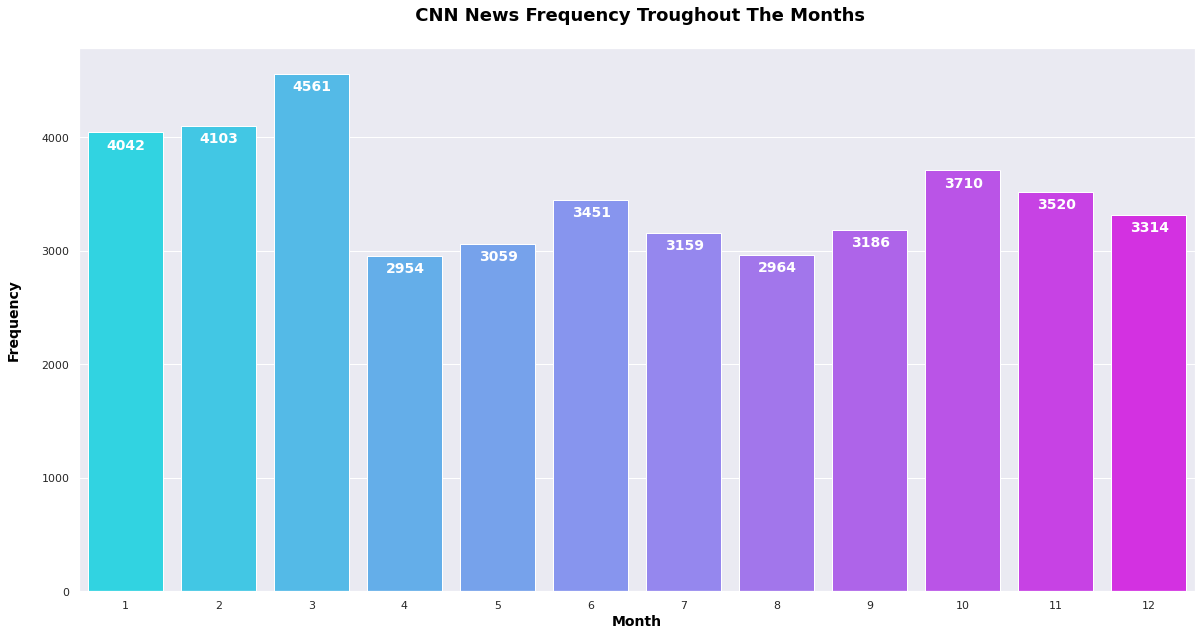

In [111]:
ax = sns.countplot(x = np.sort(df_full['Month']),
             palette = 'cool')
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel('Month', color = 'black',size = 14, weight ='bold')
plt.ylabel('Frequency\n', color = 'black', size = 14, weight = 'bold')
plt.title(' CNN News Frequency Troughout The Months\n',
          size = 18,
          color = 'black',
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()-150),
              color = 'white',
              weight = 'bold',
              size = 14)

plt.show()

Seems like CNN mostly post news in the **first quarter of a year**.

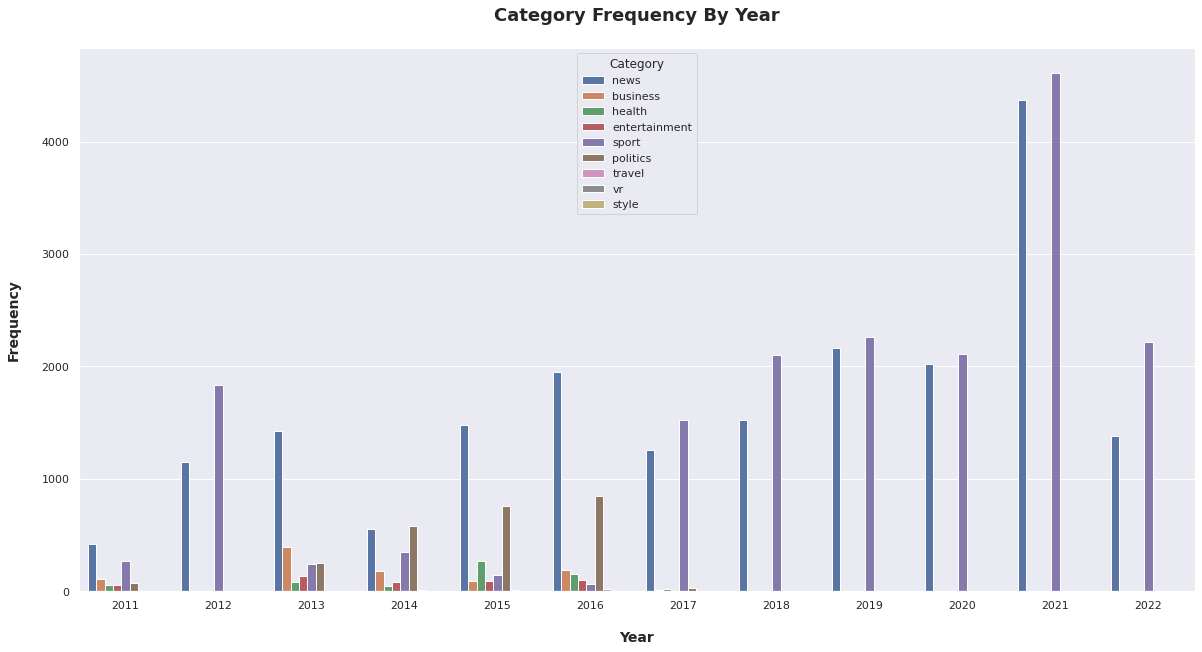

In [106]:
sns.countplot(x = np.sort(df_full['Year']), 
              hue = df_full['Category'])
sns.set(rc={'figure.figsize' : (20,10)})

plt.xlabel('\nYear', size = 14, weight = 'bold')
plt.ylabel('Frequency\n', size = 14, weight = 'bold')
plt.title('Category Frequency By Year\n',
          size = 18,
          weight = 'bold')

plt.show()

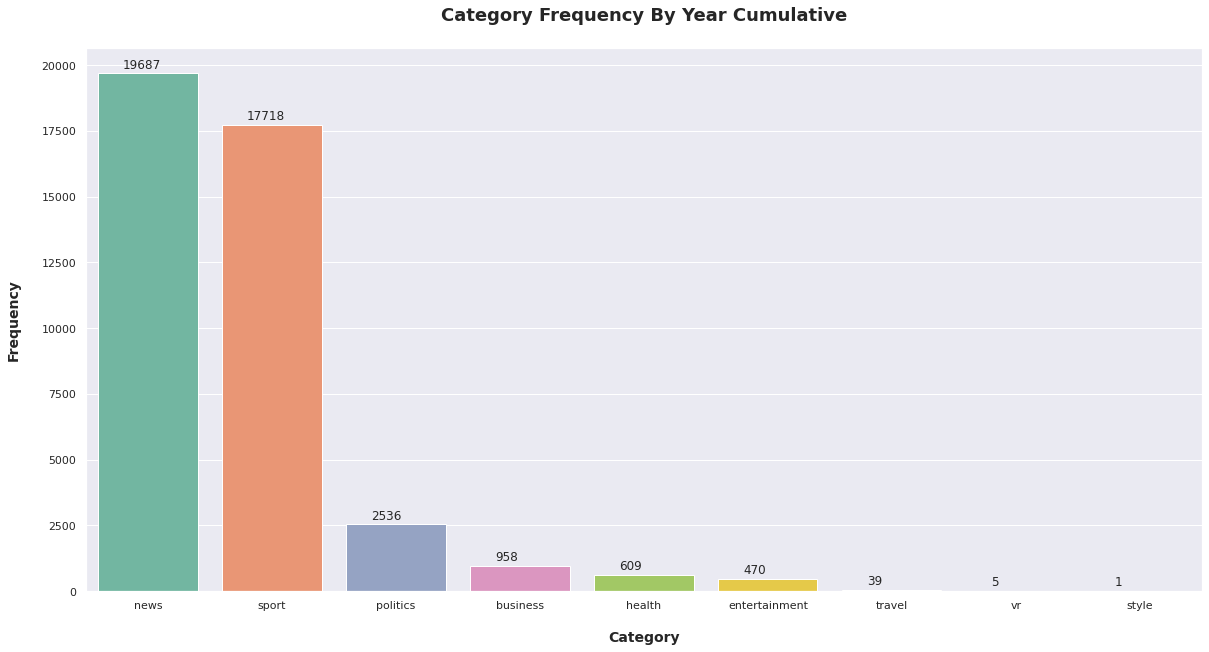

In [103]:
ax = sns.countplot(x = df_full['Category'], 
              order = df_full['Category'].value_counts(ascending=False).index,
              palette="Set2")
plt.xlabel('\nCategory', size = 14, weight = 'bold')
plt.ylabel('Frequency\n', size = 14, weight = 'bold')
plt.title('Category Frequency By Year Cumulative\n', size = 18,
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2,p.get_height()+200))

plt.show()

**Breakking News Category** and **Sport Category** dominating CNN News.

In [77]:
df_yearly = pd.DataFrame({'Year' : np.sort(df_full['Year'].unique()),
                          'Frequency' : pd.Series(np.sort(df_full['Year'].value_counts()))})
df_yearly = df_yearly.set_index(pd.Index([1,2,3,4,5,6,7,8,9,10,11,12]),'Year')

df_yearly



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Frequency
1,2011,976
2,2012,1793
3,2013,2514
4,2014,2840
5,2015,2843
6,2016,2979
7,2017,3313
8,2018,3603
9,2019,3628
10,2020,4135


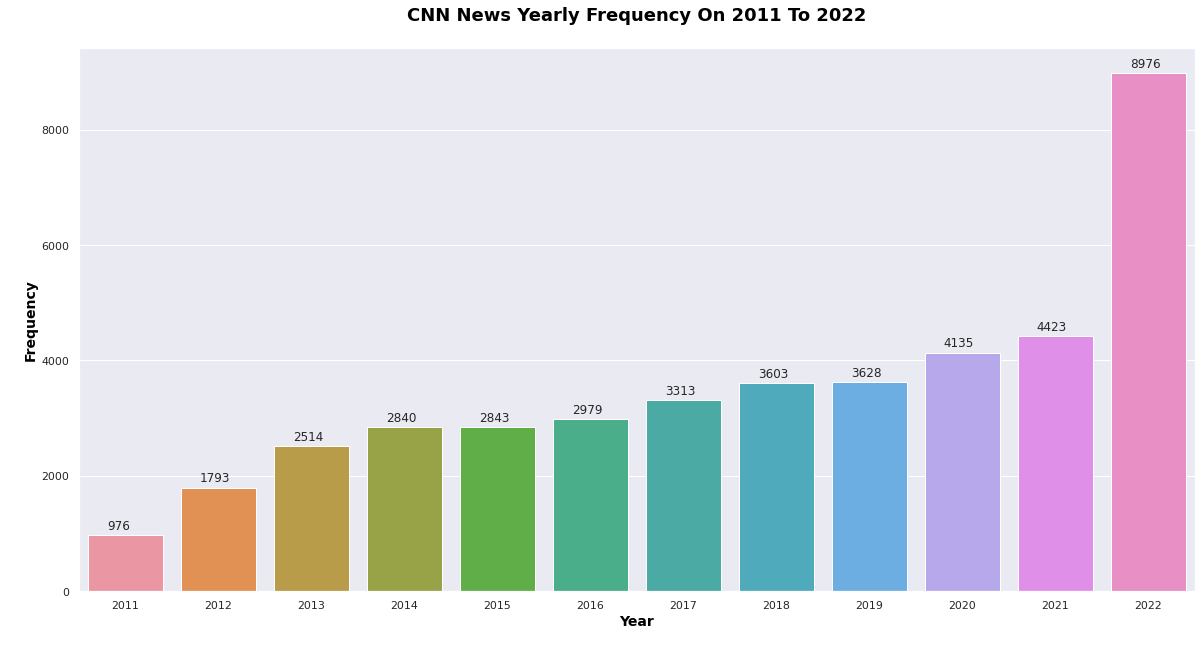

In [102]:
ax = sns.barplot(data=df_yearly,
            x='Year',
            y='Frequency')
plt.xlabel('Year\n', size = 14, color = 'black', weight = 'bold')
plt.ylabel('\nFrequency', size = 14, color = 'black', weight = 'bold')
plt.title('CNN News Yearly Frequency On 2011 To 2022\n', size = 18, 
          weight = 'bold',
          color = 'black')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+100))


plt.show()


CNN News *constantly* increases their news frequency **every year** since 2011.

In [79]:
df_monthly = pd.DataFrame({'Month' : df_full['Month'].value_counts().index,
                          'Frequency' : pd.Series(df_full['Month'].value_counts())})

df_monthly = df_monthly.sort_values(by = 'Month')
df_monthly


,Month,Frequency
1,1,4042
2,2,4103
3,3,4561
4,4,2954
5,5,3059
6,6,3451
7,7,3159
8,8,2964
9,9,3186
10,10,3710


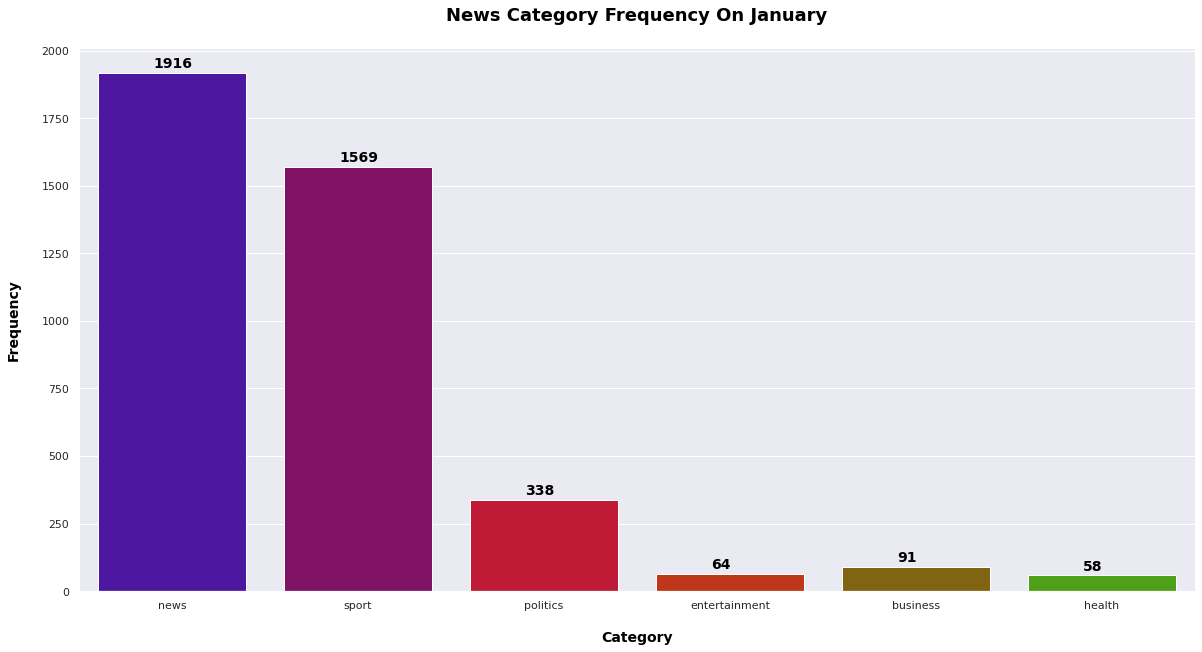

In [122]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 1,'Category'], 
                   palette = 'brg',
                   order = df.loc[df_full.Month == 1,'Category'].value_counts(ascending = False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On January\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3, p.get_height()+20),
                     color = 'black',
                     size = 14,
                     weight = 'bold')

plt.show()

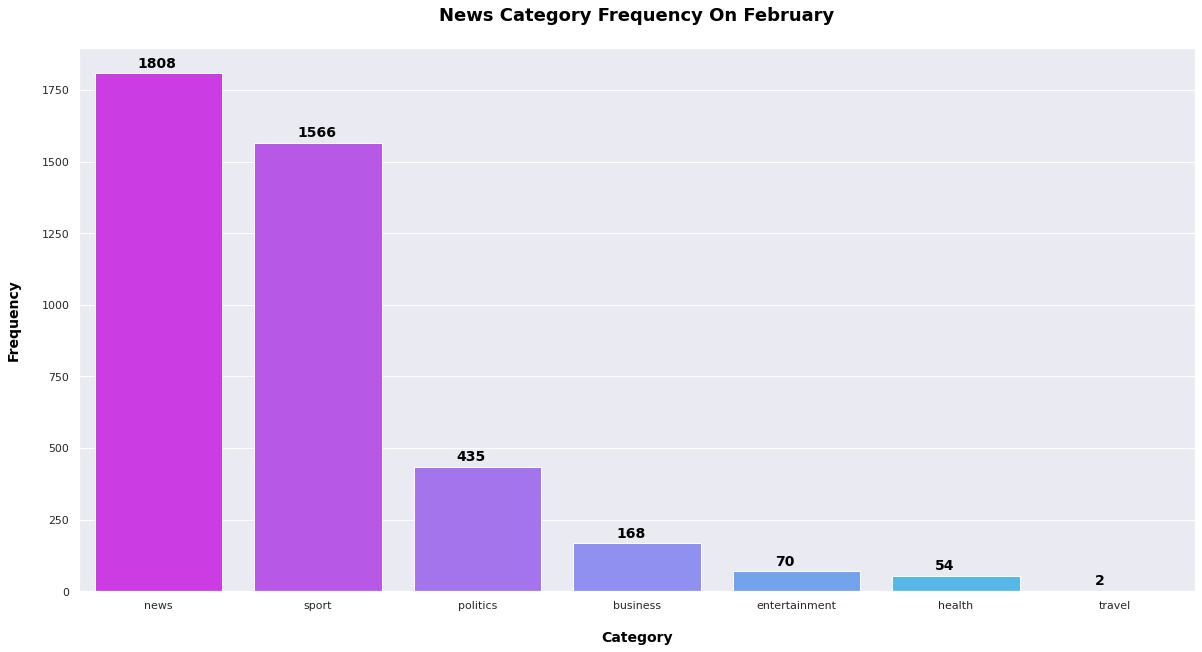

In [125]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 2,'Category'], 
              palette = 'cool_r', 
              order = df_full.loc[df_full.Month == 2,'Category'].value_counts(ascending = False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On February\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.27, p.get_height()+20),
                    color = 'black',
                    size = 14,
                    weight = 'bold')


plt.show()

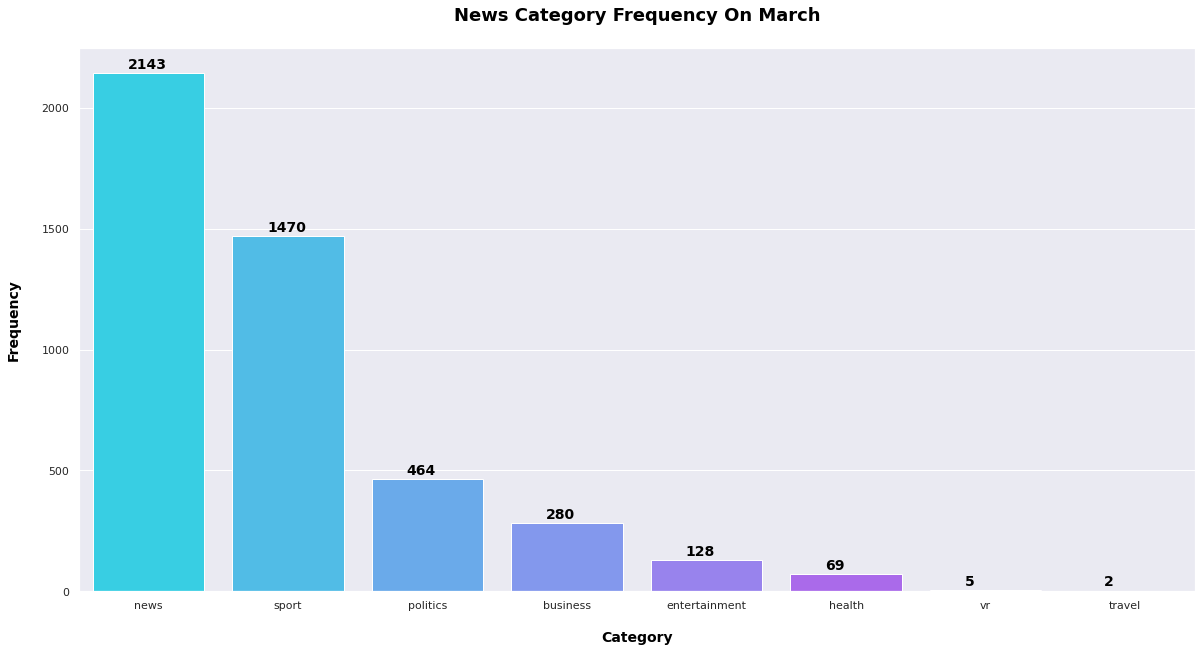

In [126]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 3,'Category'], 
              palette = 'cool',
              order = df_full.loc[df_full.Month == 3, 'Category'].value_counts(ascending=False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On March\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20),
                    size = 14,
                    color = 'black',
                    weight = 'bold')

plt.show()

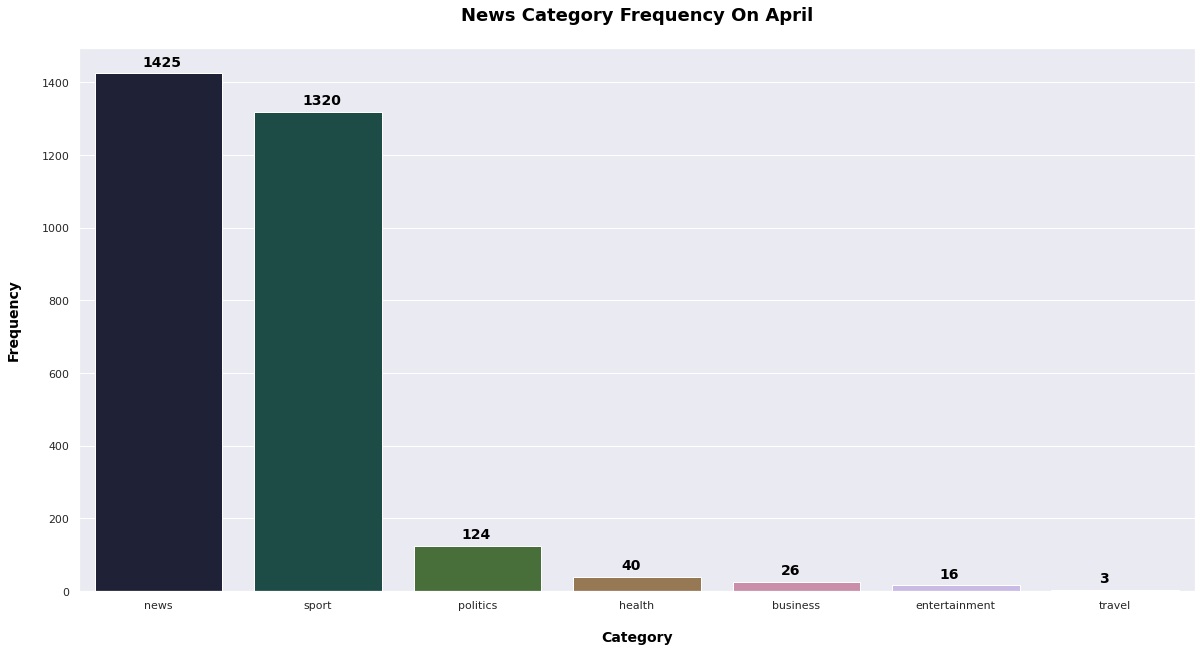

In [127]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 4,'Category'], 
              palette = 'cubehelix',
              order = df_full.loc[df_full.Month == 4, 'Category'].value_counts(ascending=False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On April\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20),
                    color = 'black',
                    size = 14,
                    weight = 'bold')

plt.show()

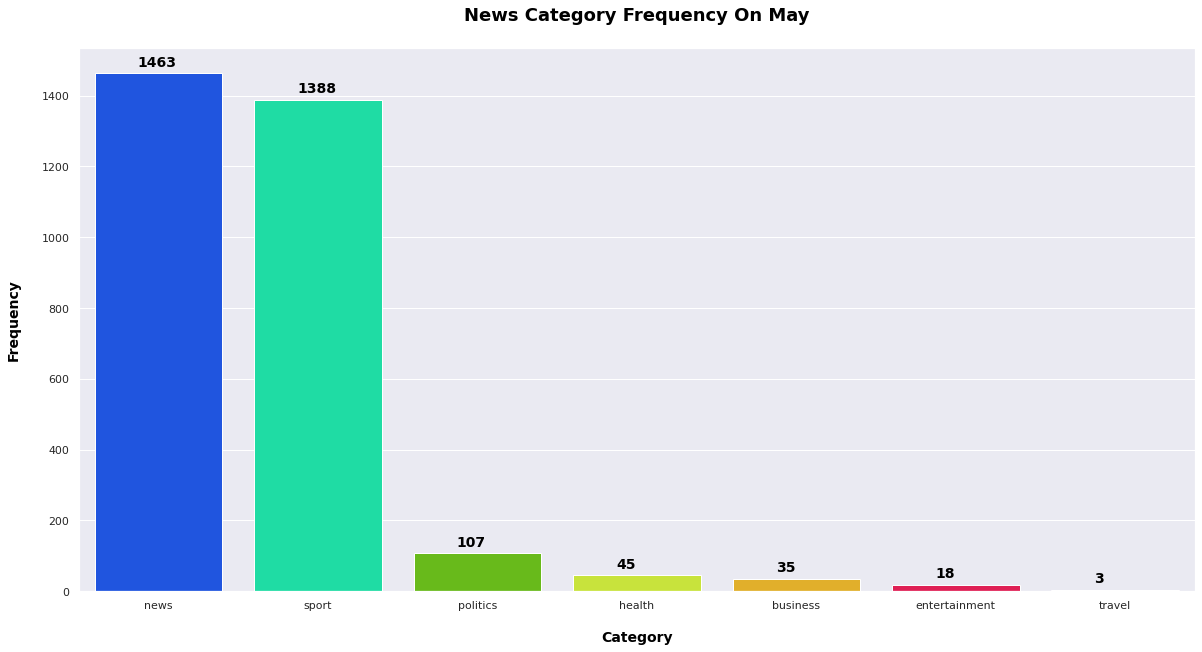

In [129]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 5,'Category'], 
              palette = 'gist_ncar',
              order = df_full.loc[df_full.Month == 5, 'Category'].value_counts(ascending = False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On May\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.27, p.get_height()+20),
                    size = 14,
                    color = 'black',
                    weight = 'bold')

plt.show()

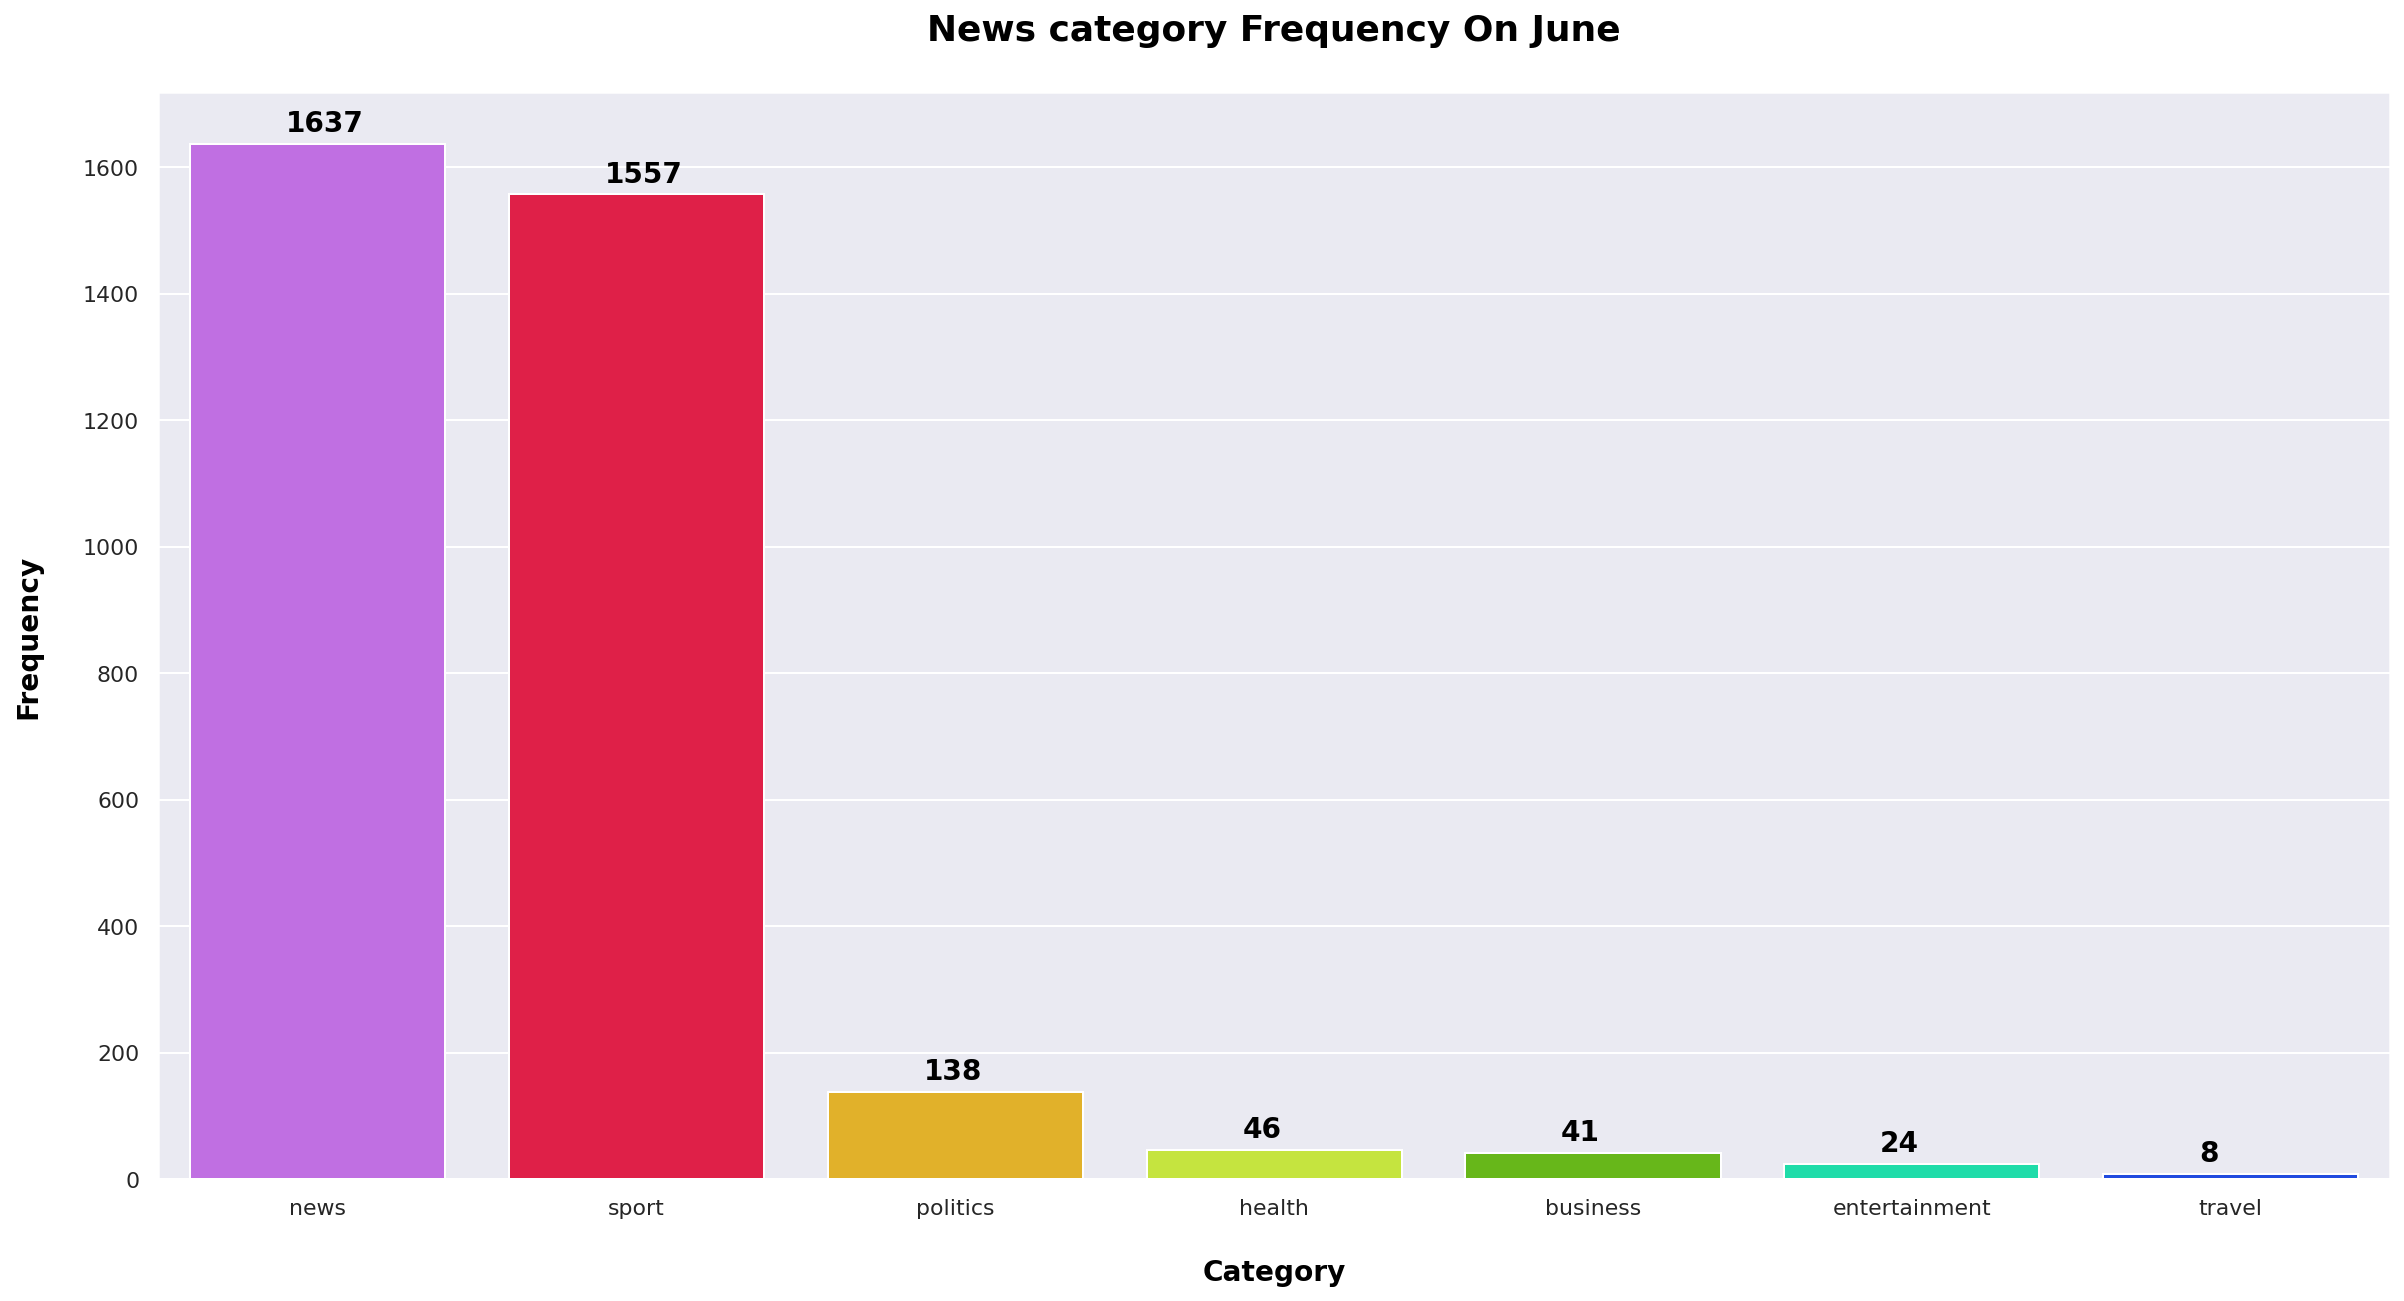

In [133]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 6,'Category'], 
              palette = 'gist_ncar_r',
              order=df_full.loc[df_full.Month == 6,'Category'].value_counts(ascending = False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News category Frequency On June\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20),
                    size = 14,
                    color = 'black',
                    weight = 'bold')

plt.show()

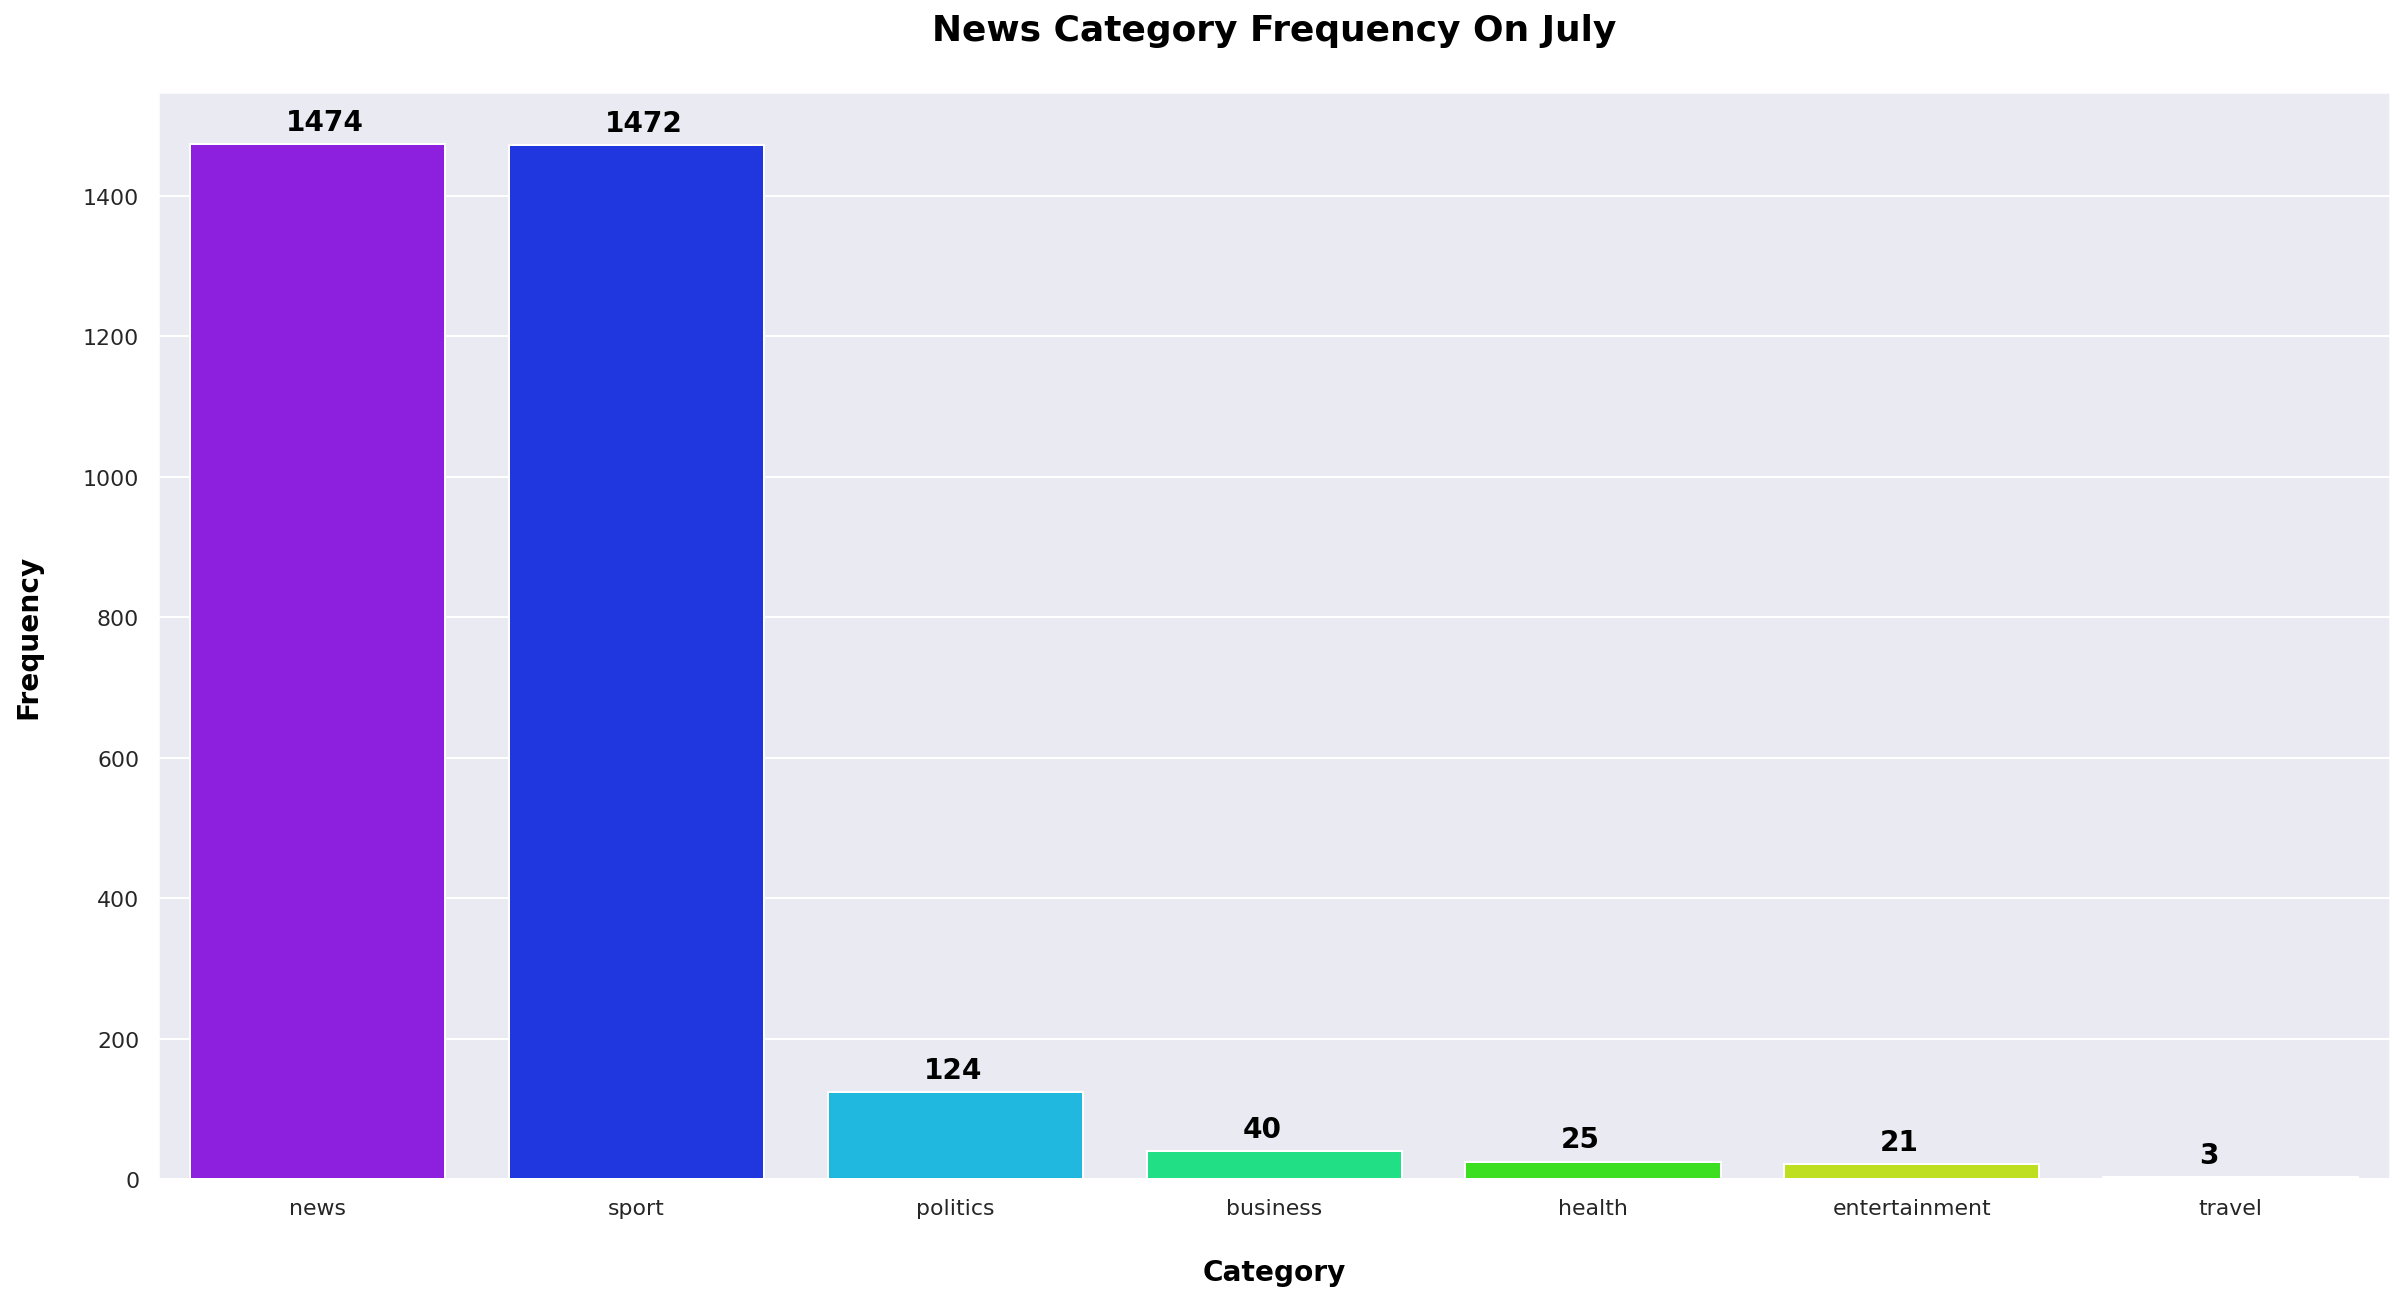

In [134]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 7,'Category'], 
              palette = 'gist_rainbow_r',
              order = df_full.loc[df_full.Month == 7,'Category'].value_counts(ascending = False).index)

plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On July\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20),
                    size = 14,
                    color = 'black',
                    weight = 'bold')

plt.show()

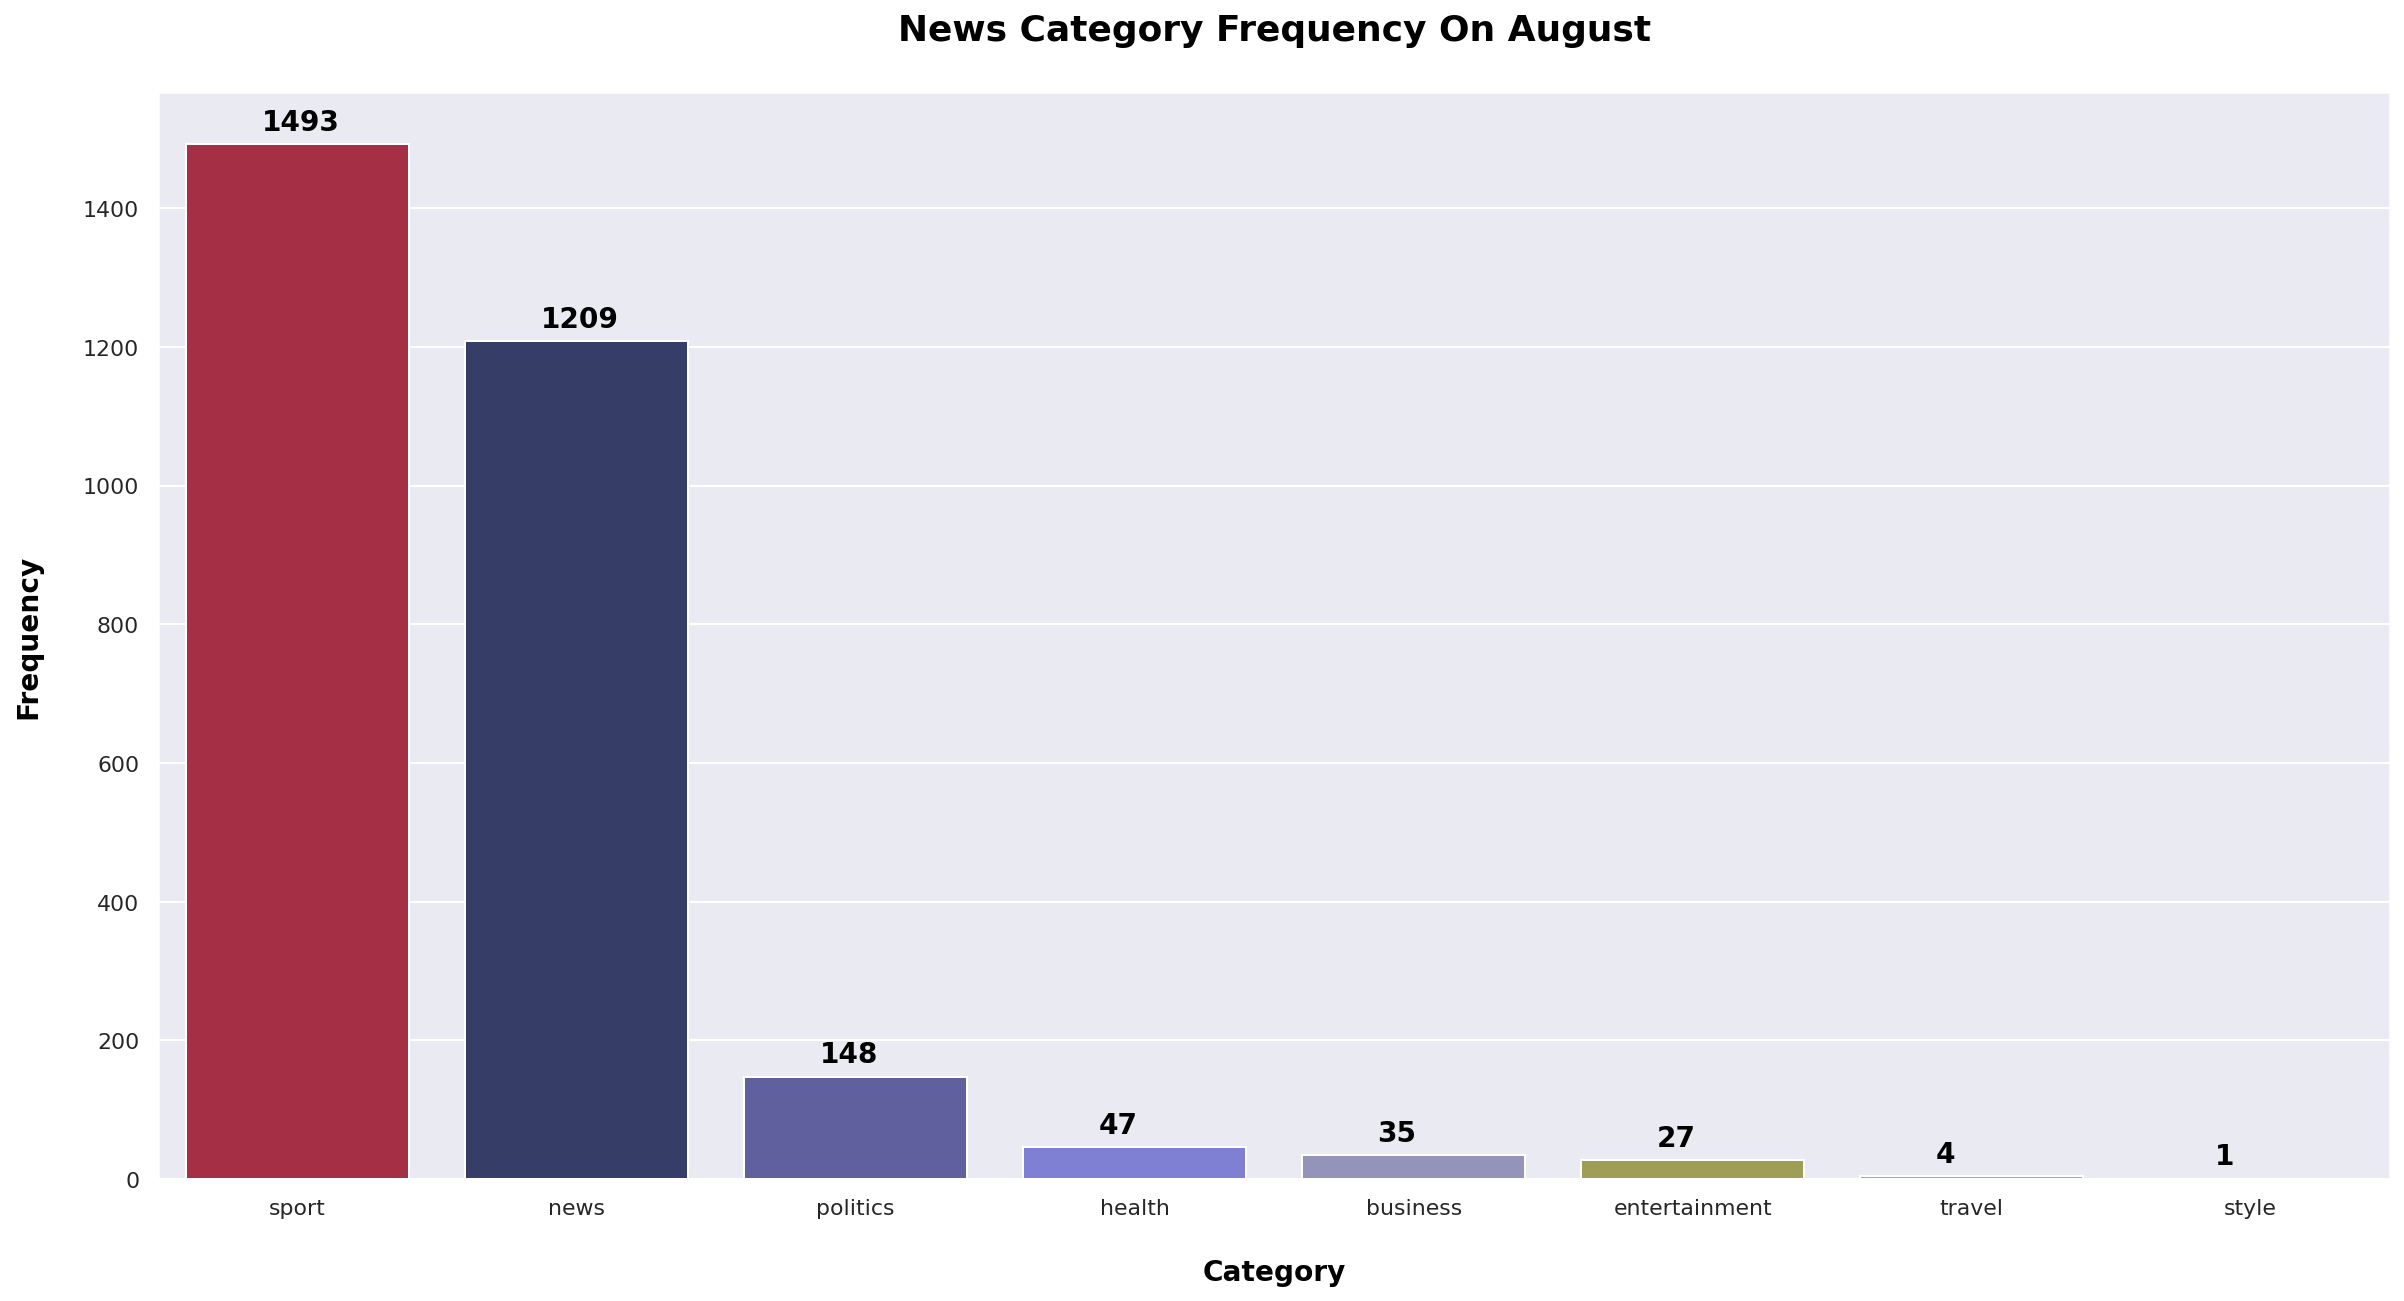

In [136]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 8,'Category'], 
                   palette = 'gist_stern',
                   order = df_full.loc[df_full.Month == 8,'Category'].value_counts(ascending=False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On August\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.27, p.get_height()+20),
                    size = 14,
                    color = 'black',
                    weight = 'bold')

plt.show()


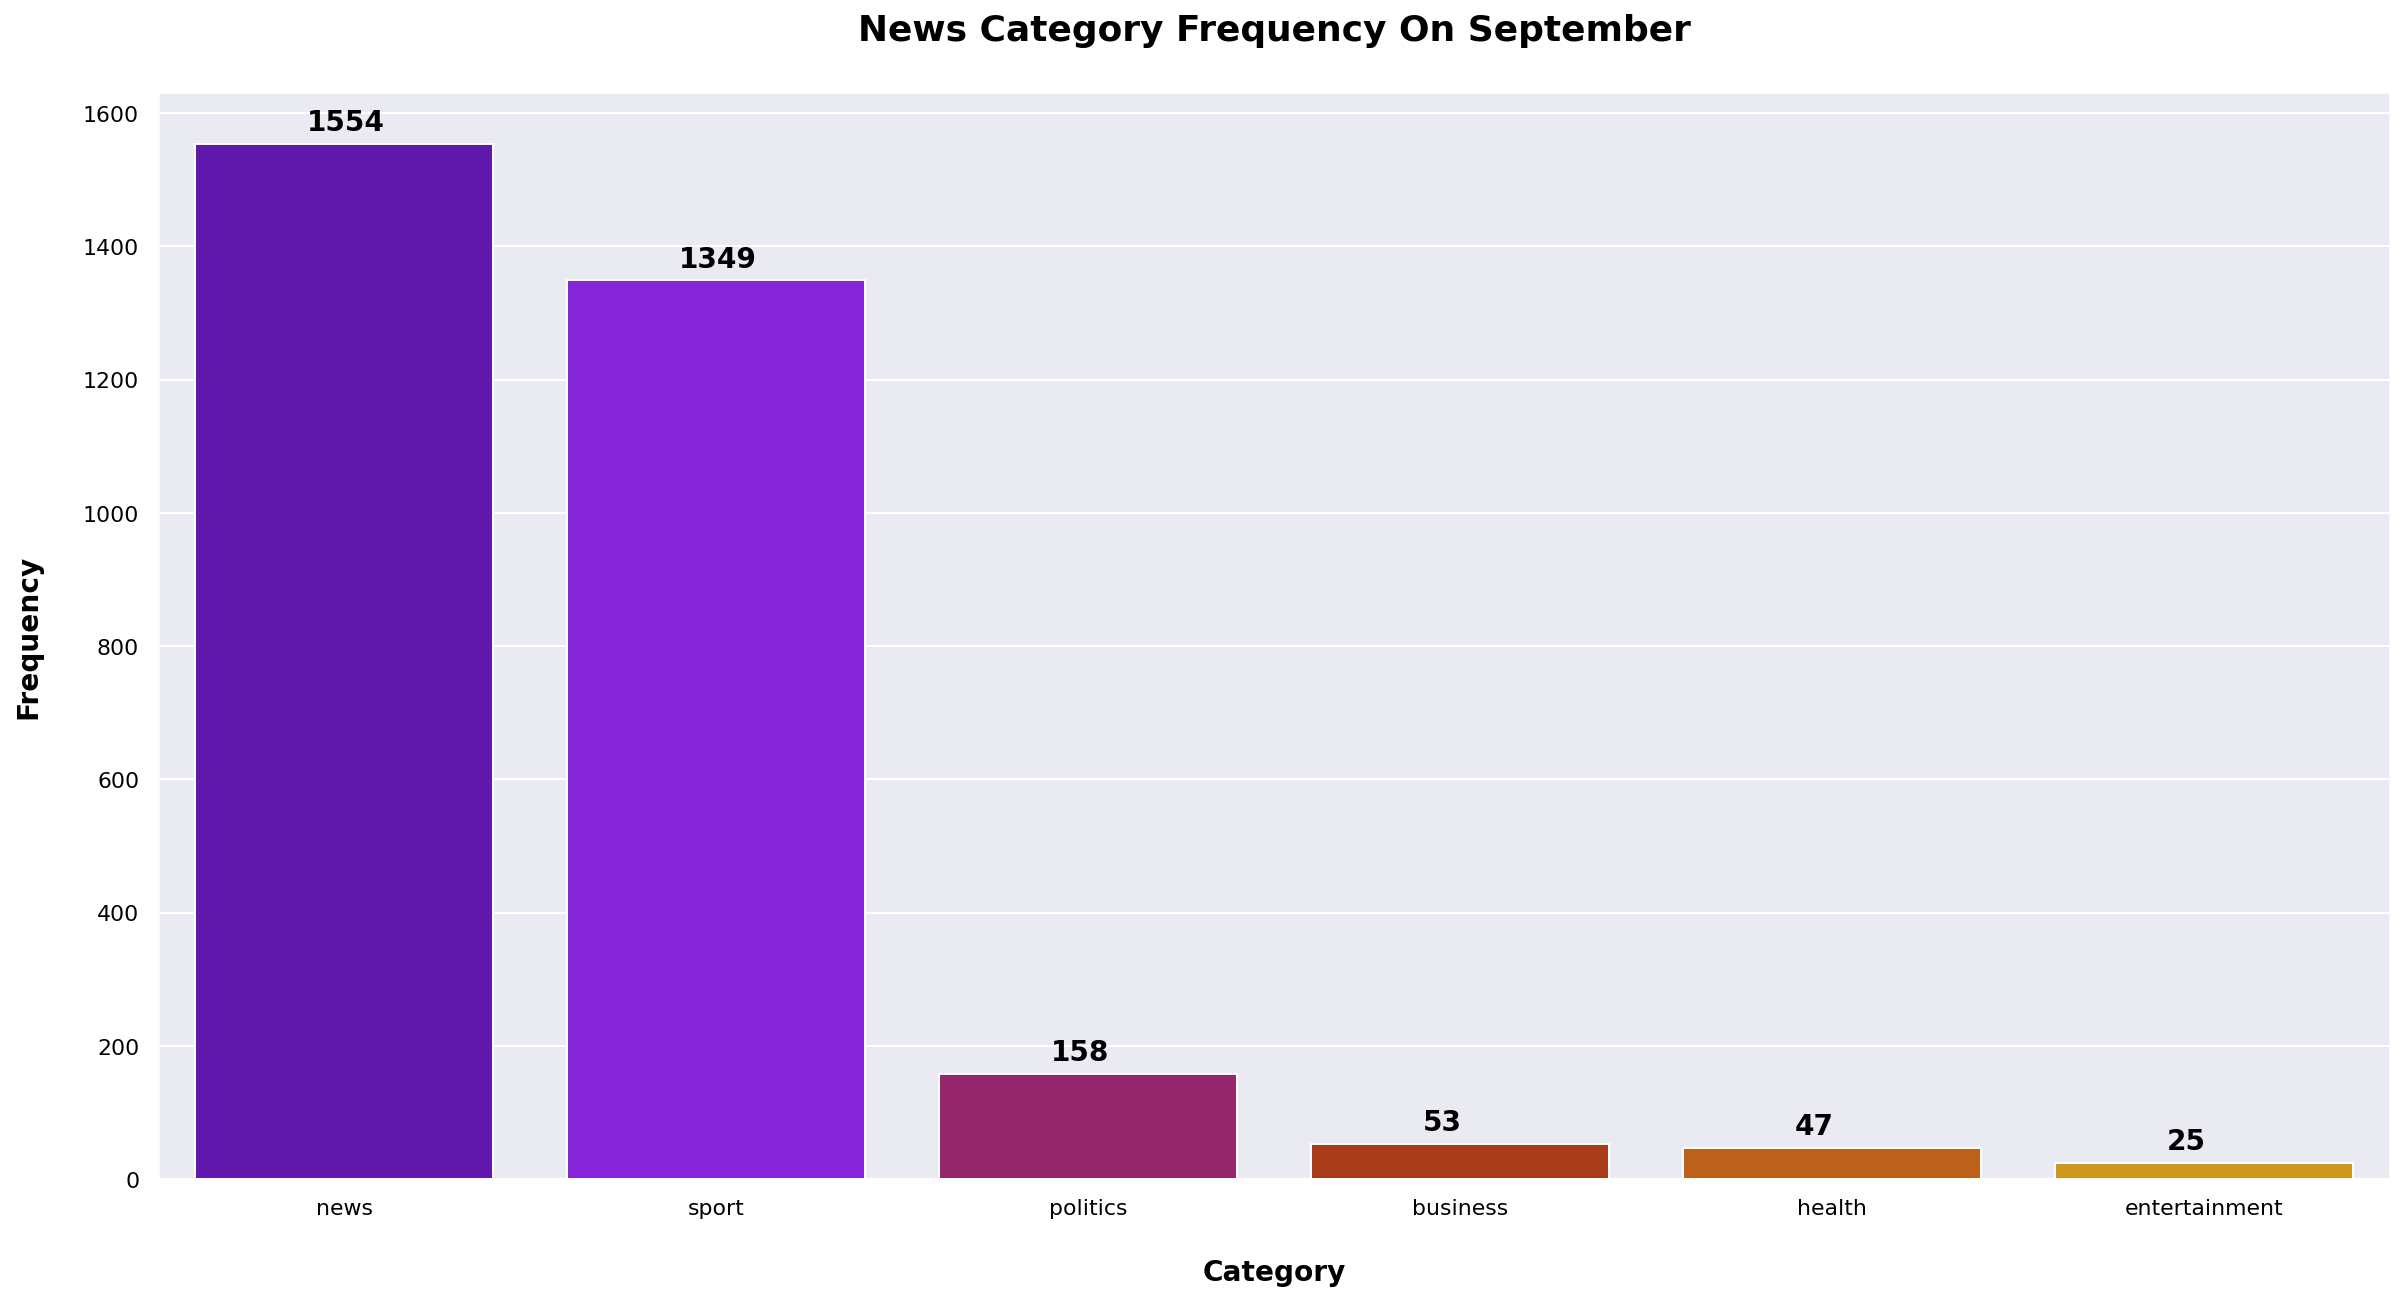

In [141]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 9,'Category'], 
                   palette = 'gnuplot',
                   order = df_full.loc[df_full.Month==9,'Category'].value_counts(ascending=False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On September\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20),
                    size = 14,
                    color = 'black',
                    weight = 'bold')

plt.show()

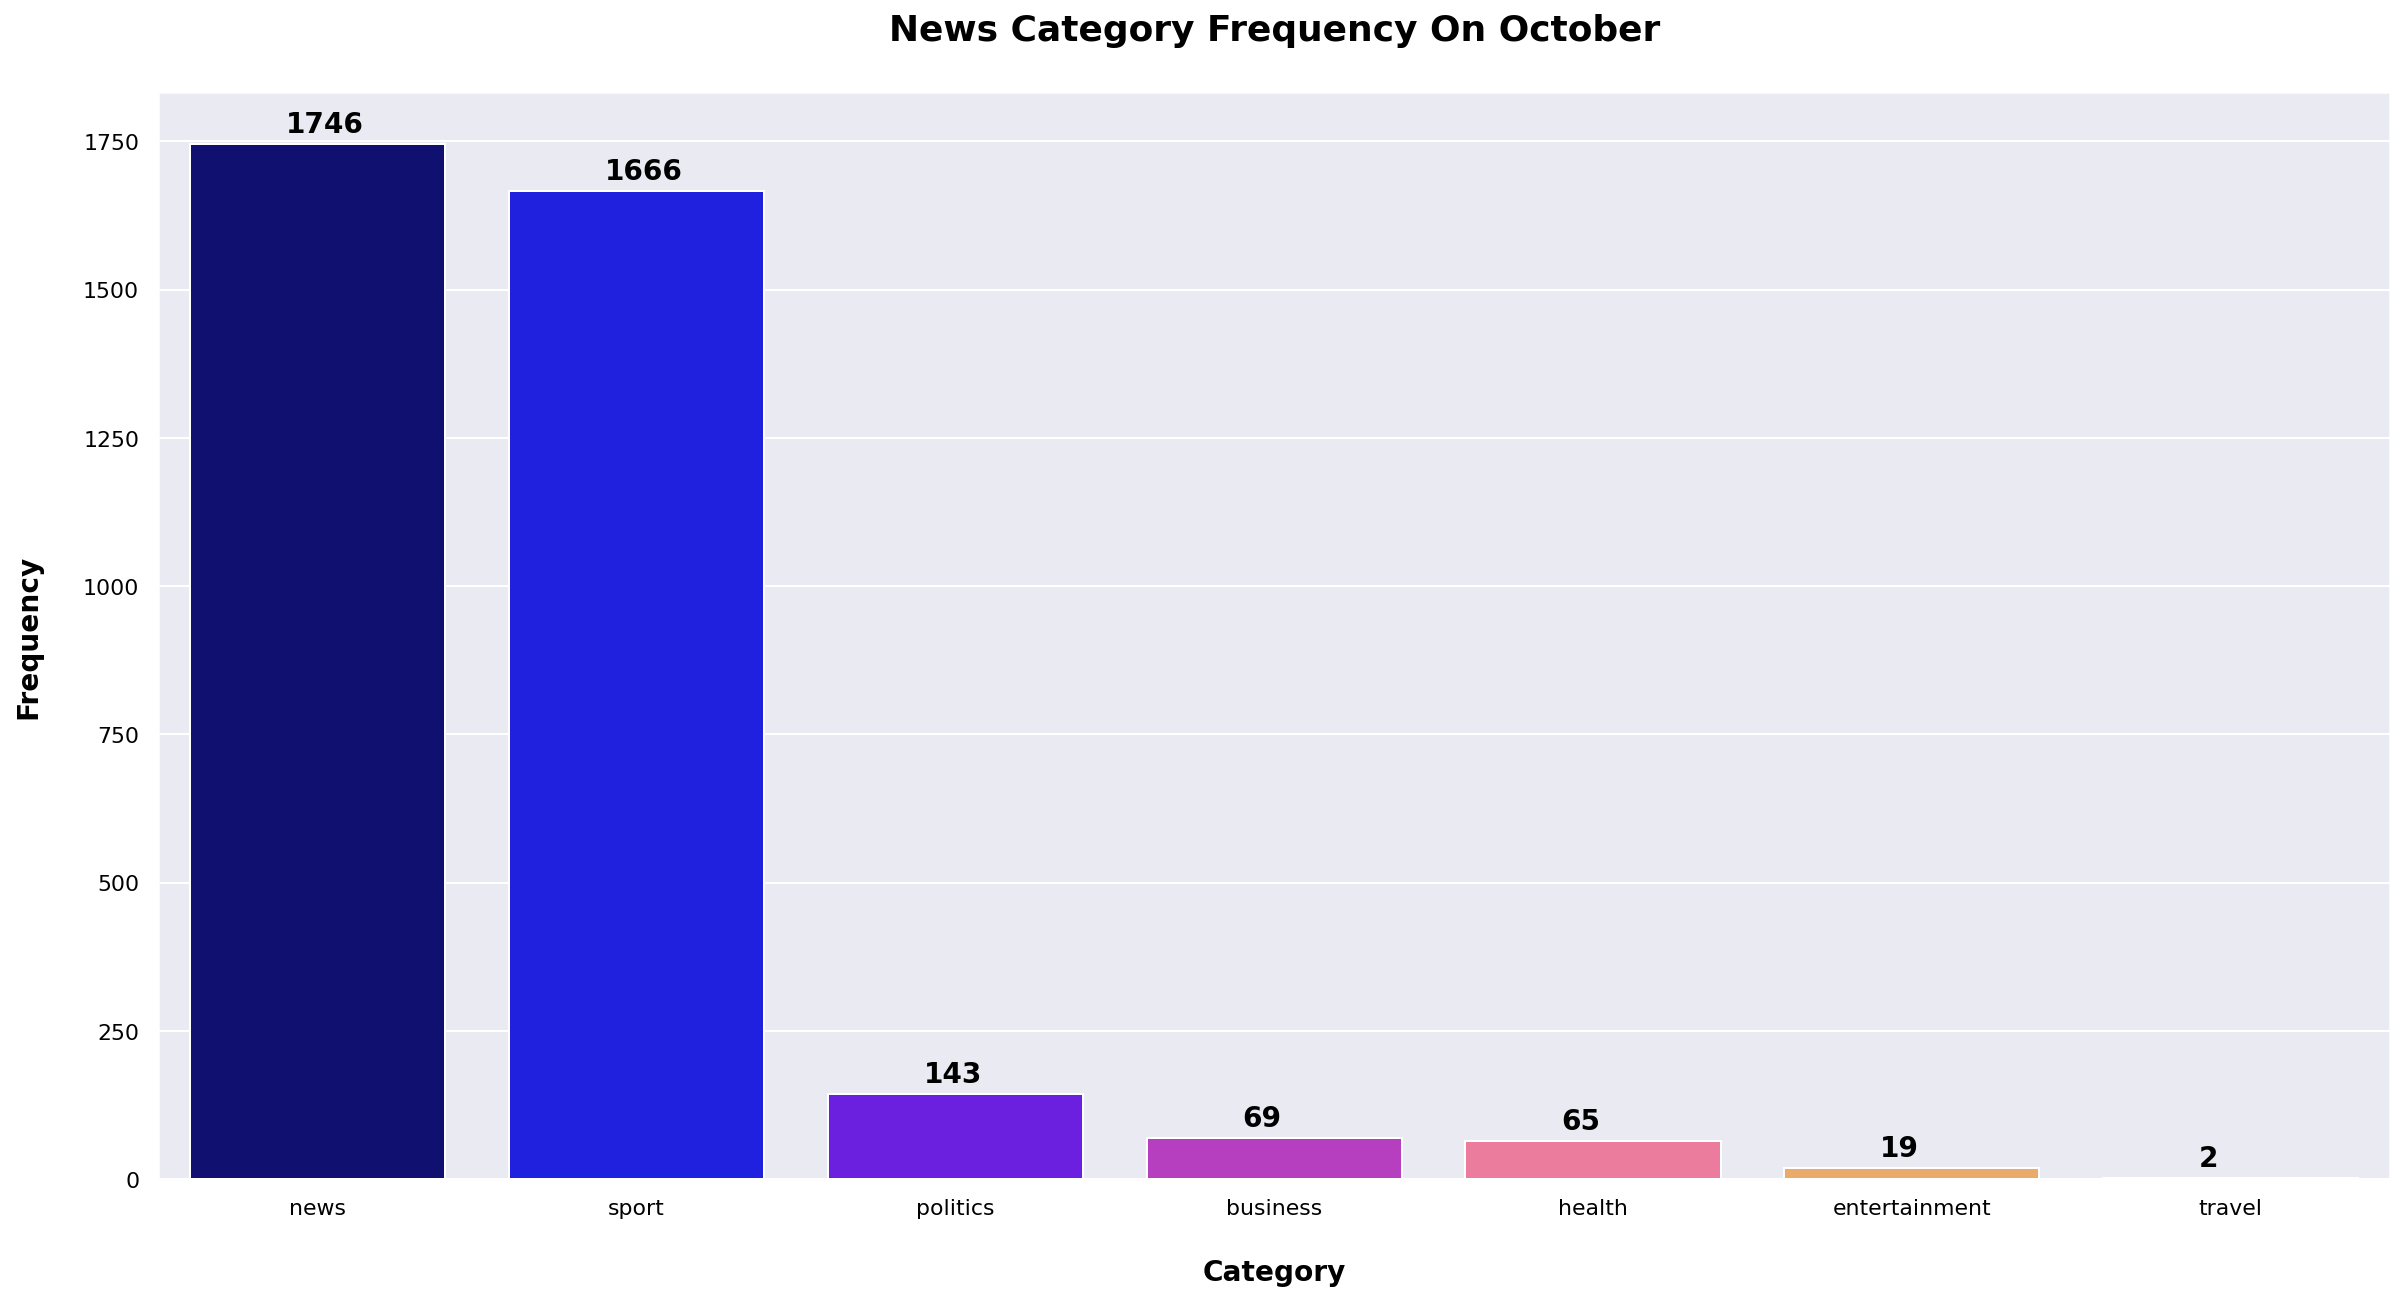

In [142]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 10,'Category'], 
                   palette = 'gnuplot2',
                   order = df_full.loc[df_full.Month == 10,'Category'].value_counts(ascending=False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight ='bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight ='bold')
plt.title('News Category Frequency On October\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()+20),
              size = 14,
              color = 'black',
              weight = 'bold')

plt.show()

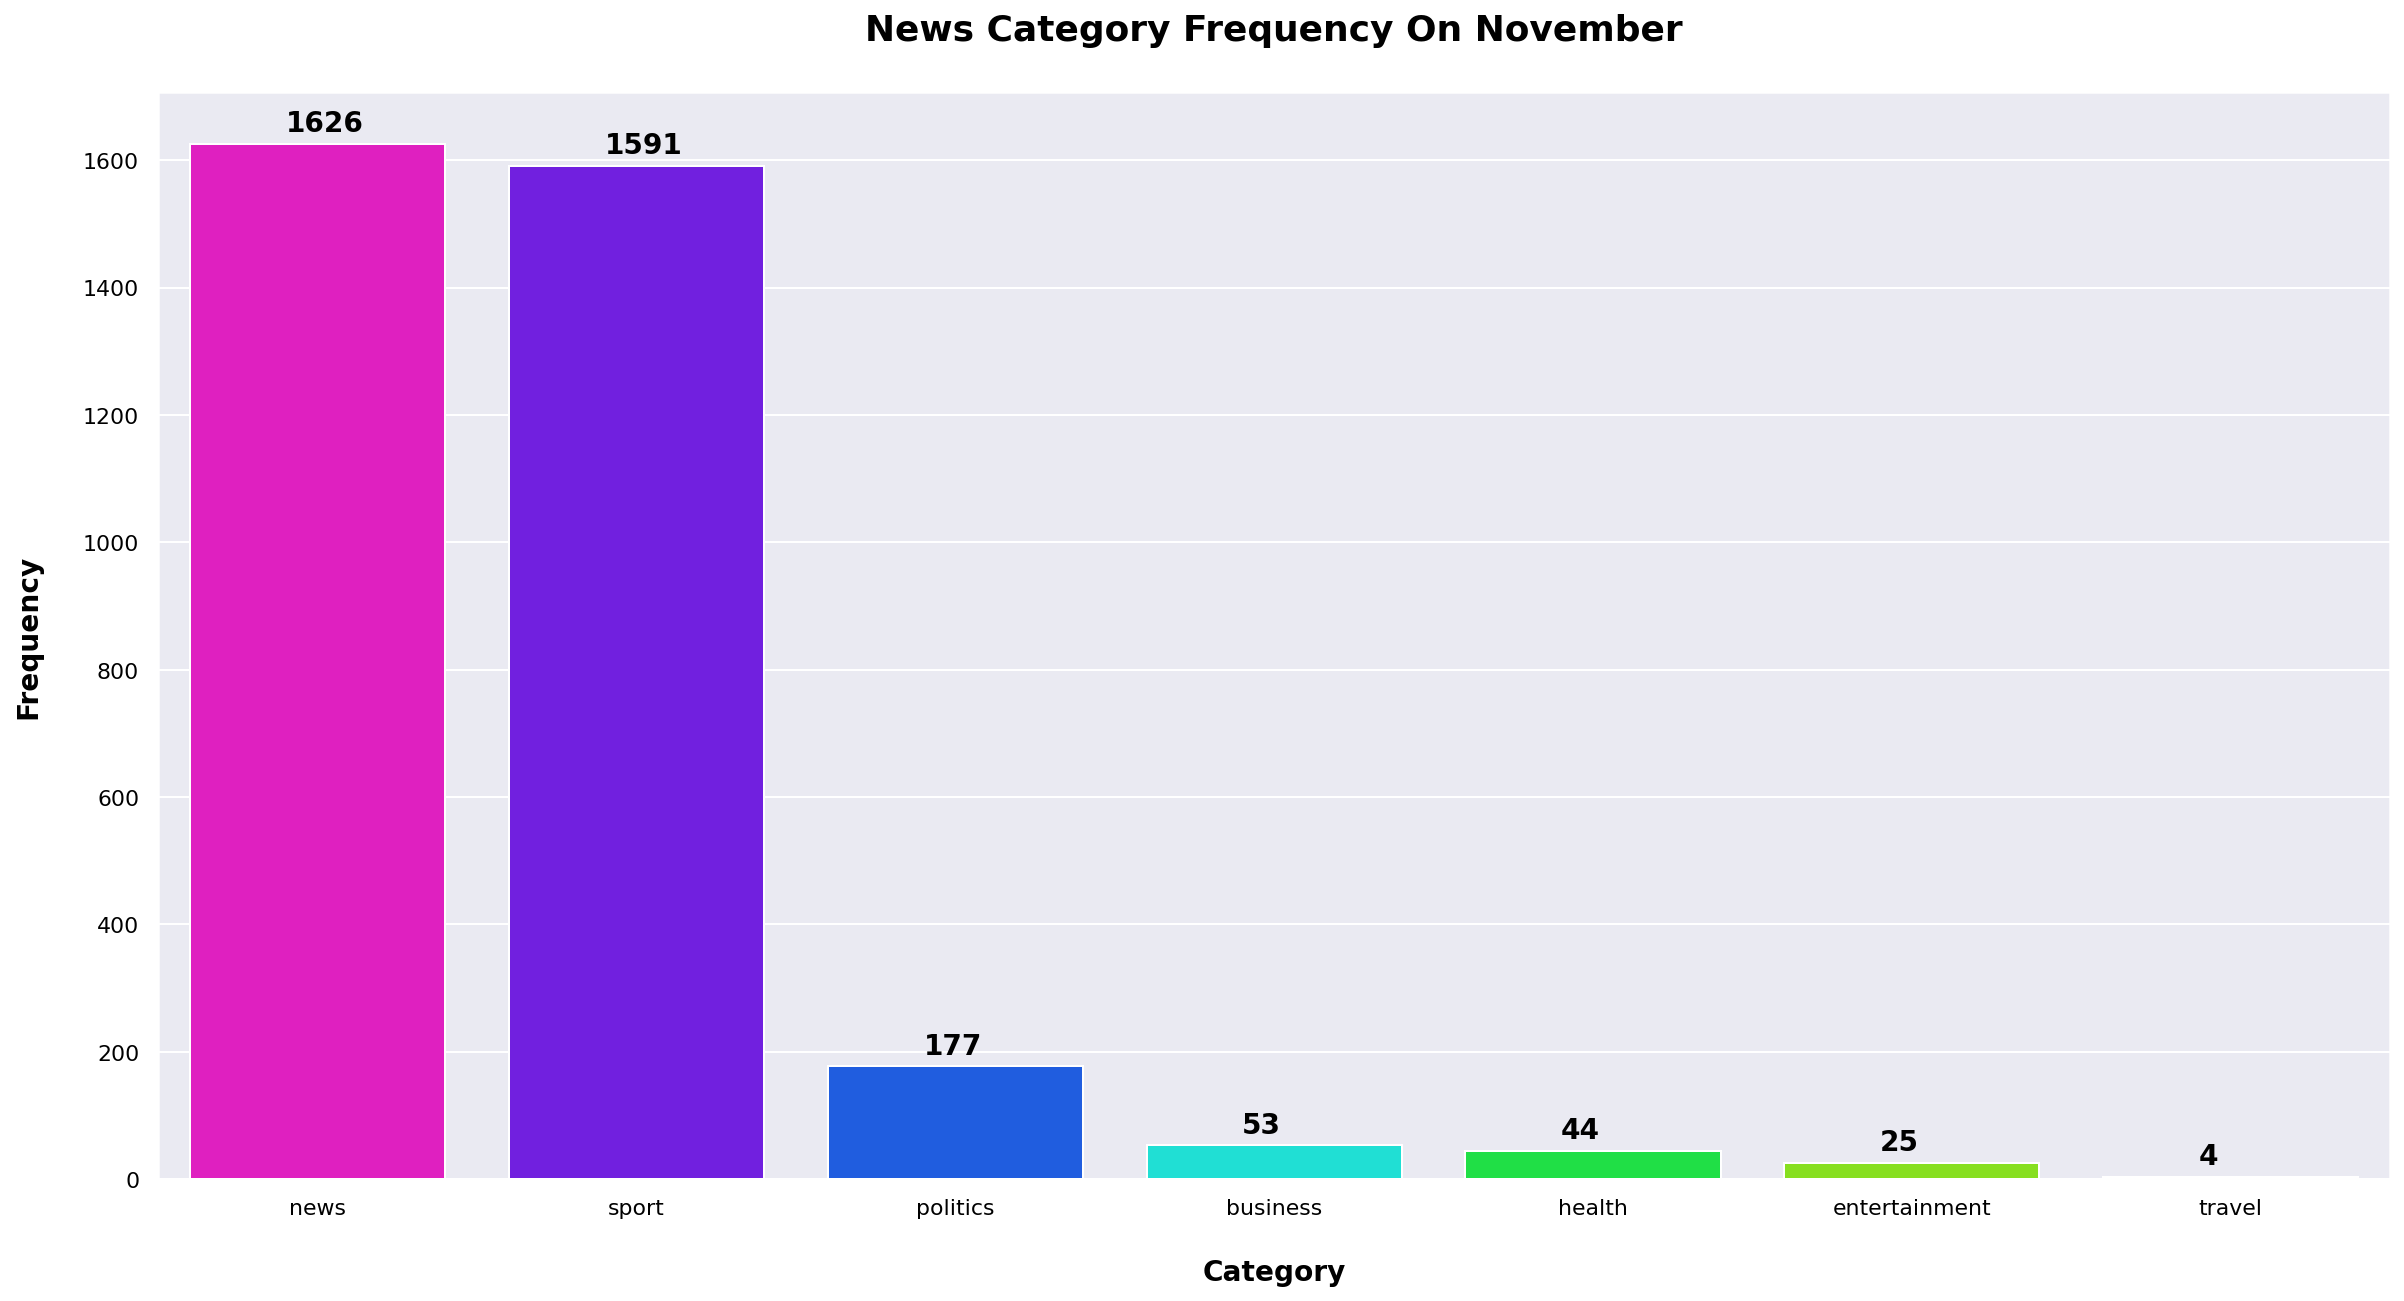

In [143]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 11,'Category'], 
                   palette = 'hsv_r',
                   order = df_full.loc[df_full.Month == 11,'Category'].value_counts(ascending=False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title( 'News Category Frequency On November\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()+20),
              size = 14,
              color = 'black',
              weight = 'bold')

plt.show()

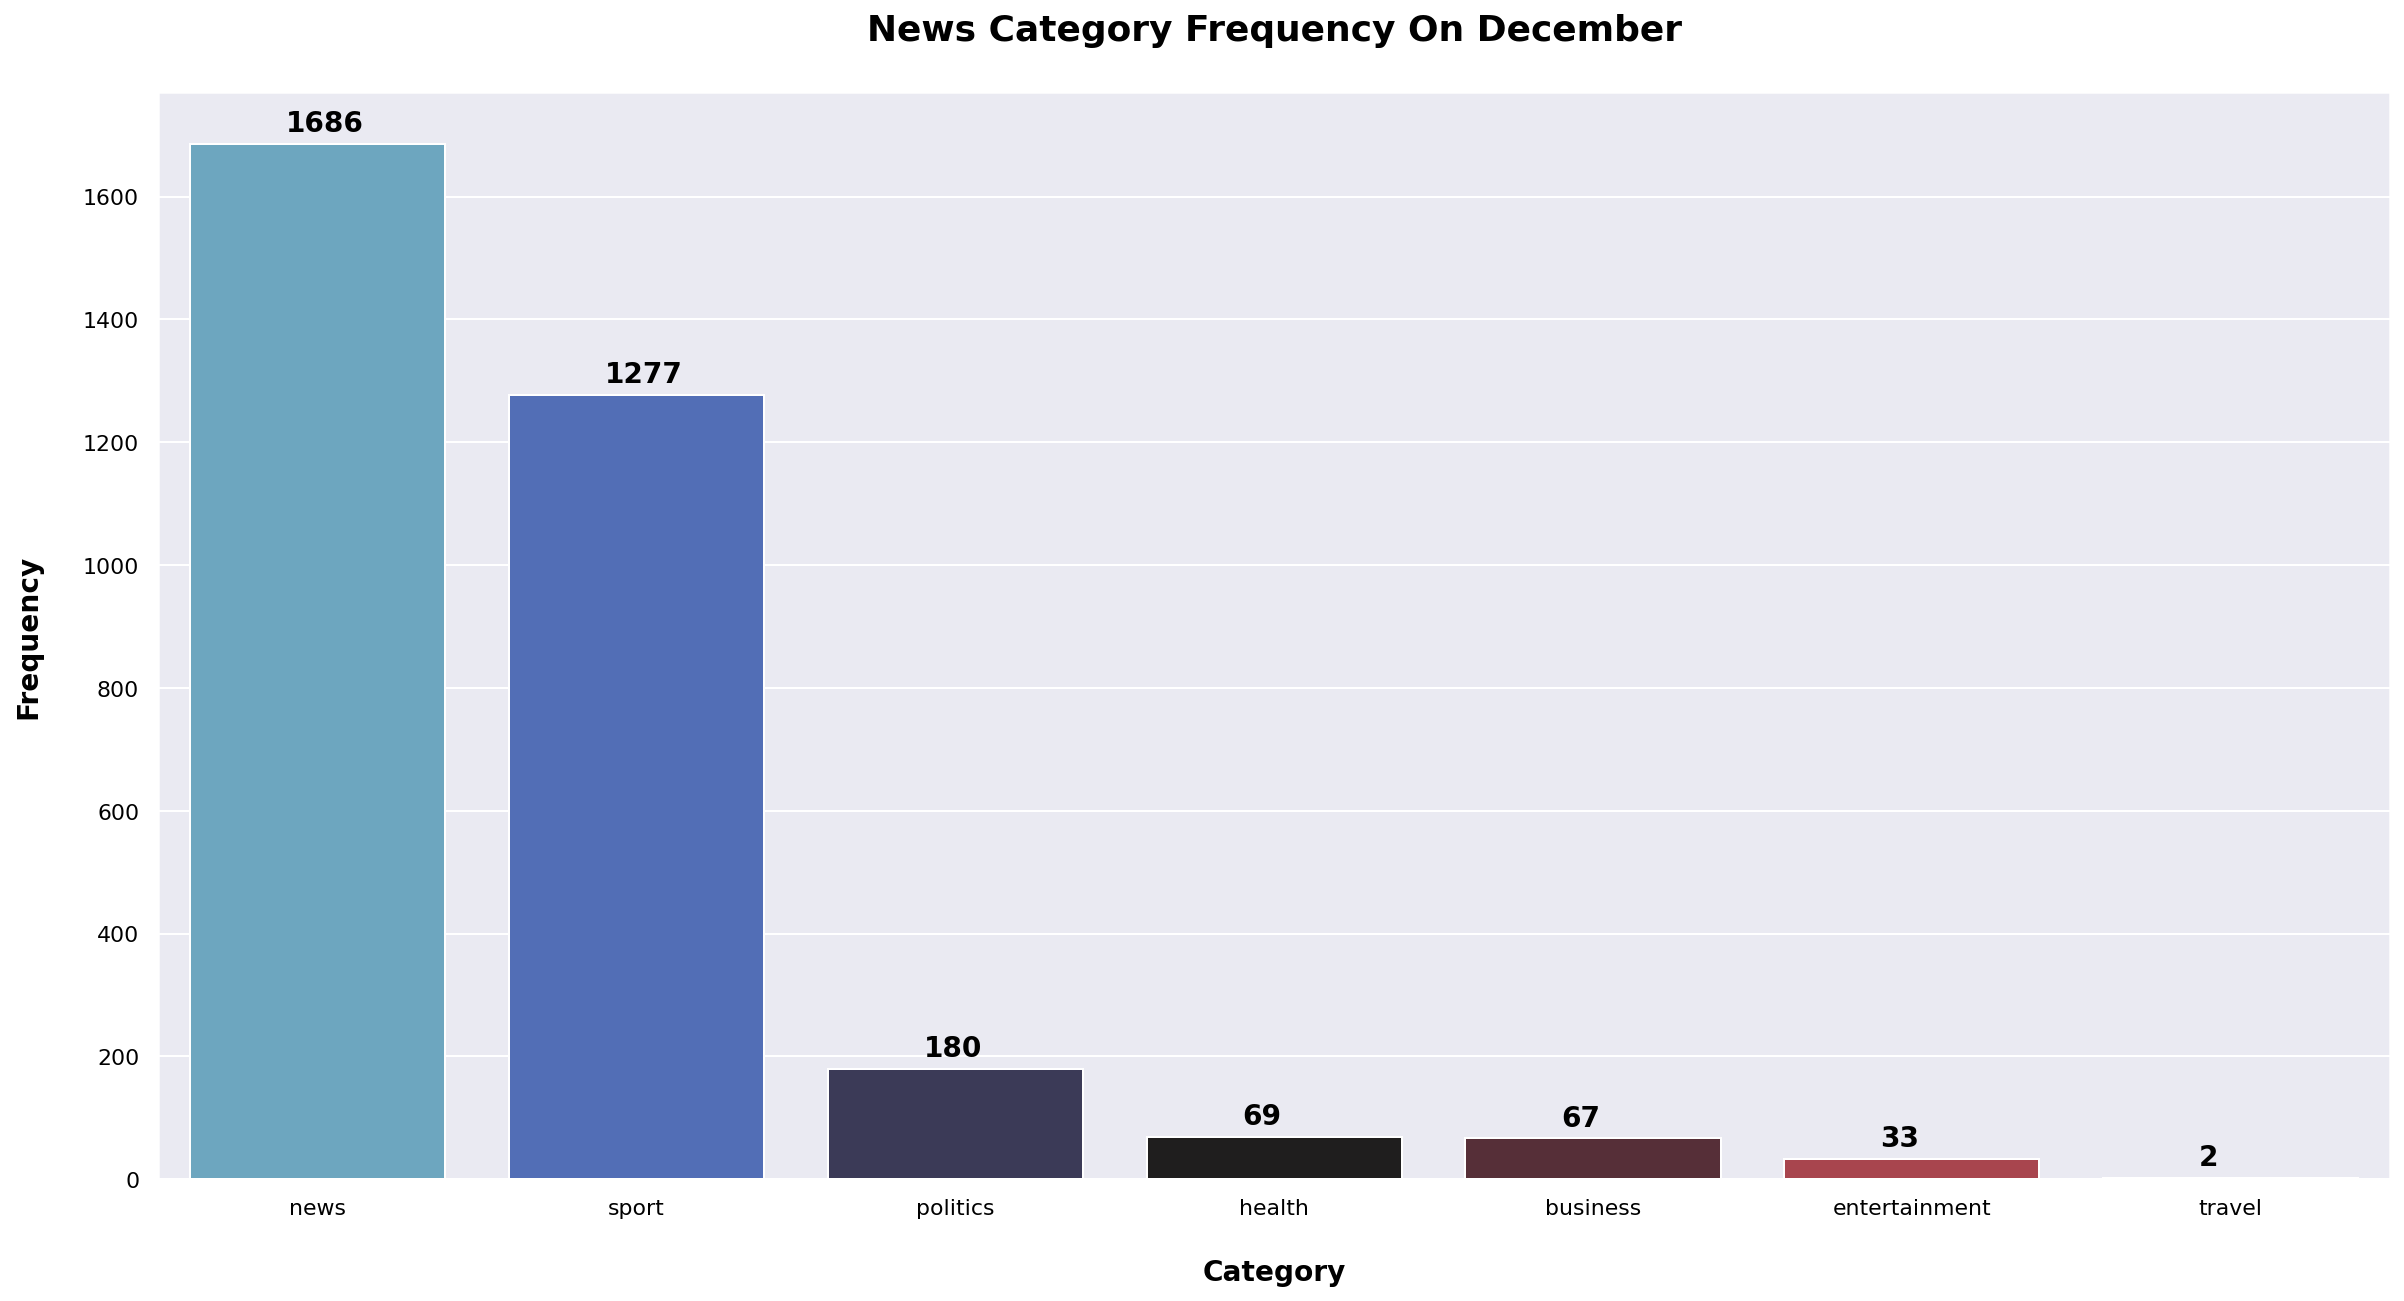

In [144]:
ax = sns.countplot(x=df_full.loc[df_full.Month == 12,'Category'], 
                   palette = 'icefire',
                   order=df_full.loc[df_full.Month==12,'Category'].value_counts(ascending=False).index)
plt.xlabel('\nCategory', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Frequency\n', size = 14, color = 'black', weight = 'bold')
plt.title('News Category Frequency On December\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()+20),
              size = 14,
              color = 'black',
              weight = 'bold')

plt.show()

### Count Every CNN News Category And Put It In A New Data Frame

In [92]:
df_monthly = pd.DataFrame({'Month': np.sort(df_full['Month'].unique()),
                        'News Count' : pd.Series(df_full.loc[df_full.Category == 'news','Month'].value_counts()),
                        'Sport Count': pd.Series(df_full.loc[df_full.Category == 'sport','Month'].value_counts()),
                        'Business Count' : pd.Series(df_full.loc[df_full.Category == 'business','Month'].value_counts()),
                        'Health Count' : pd.Series(df_full.loc[df_full.Category == 'health','Month'].value_counts()),
                        'Politics Count' : pd.Series(df_full.loc[df_full.Category == 'politics','Month'].value_counts()),
                        'Entertainment Count' : pd.Series(df_full.loc[df_full.Category == 'entertainment','Month'].value_counts())})
df_monthly = df_monthly.fillna(0)
df_monthly['Month'] = df_monthly['Month'].apply(str)
df_monthly.iloc[:,[3,4,6]] = df_monthly.iloc[:,[3,4,6]].astype(int)
df_monthly

,Month,News Count,Sport Count,Business Count,Health Count,Politics Count,Entertainment Count
1,1,1916,1569,91,58,338,64
2,2,1808,1566,168,54,435,70
3,3,2143,1470,280,69,464,128
4,4,1425,1320,26,40,124,16
5,5,1463,1388,35,45,107,18
6,6,1637,1557,41,46,138,24
7,7,1474,1472,40,25,124,21
8,8,1209,1493,35,47,148,27
9,9,1554,1349,53,47,158,25
10,10,1746,1666,69,65,143,19


####Let's See The Frequency Of Every Category On Every Month

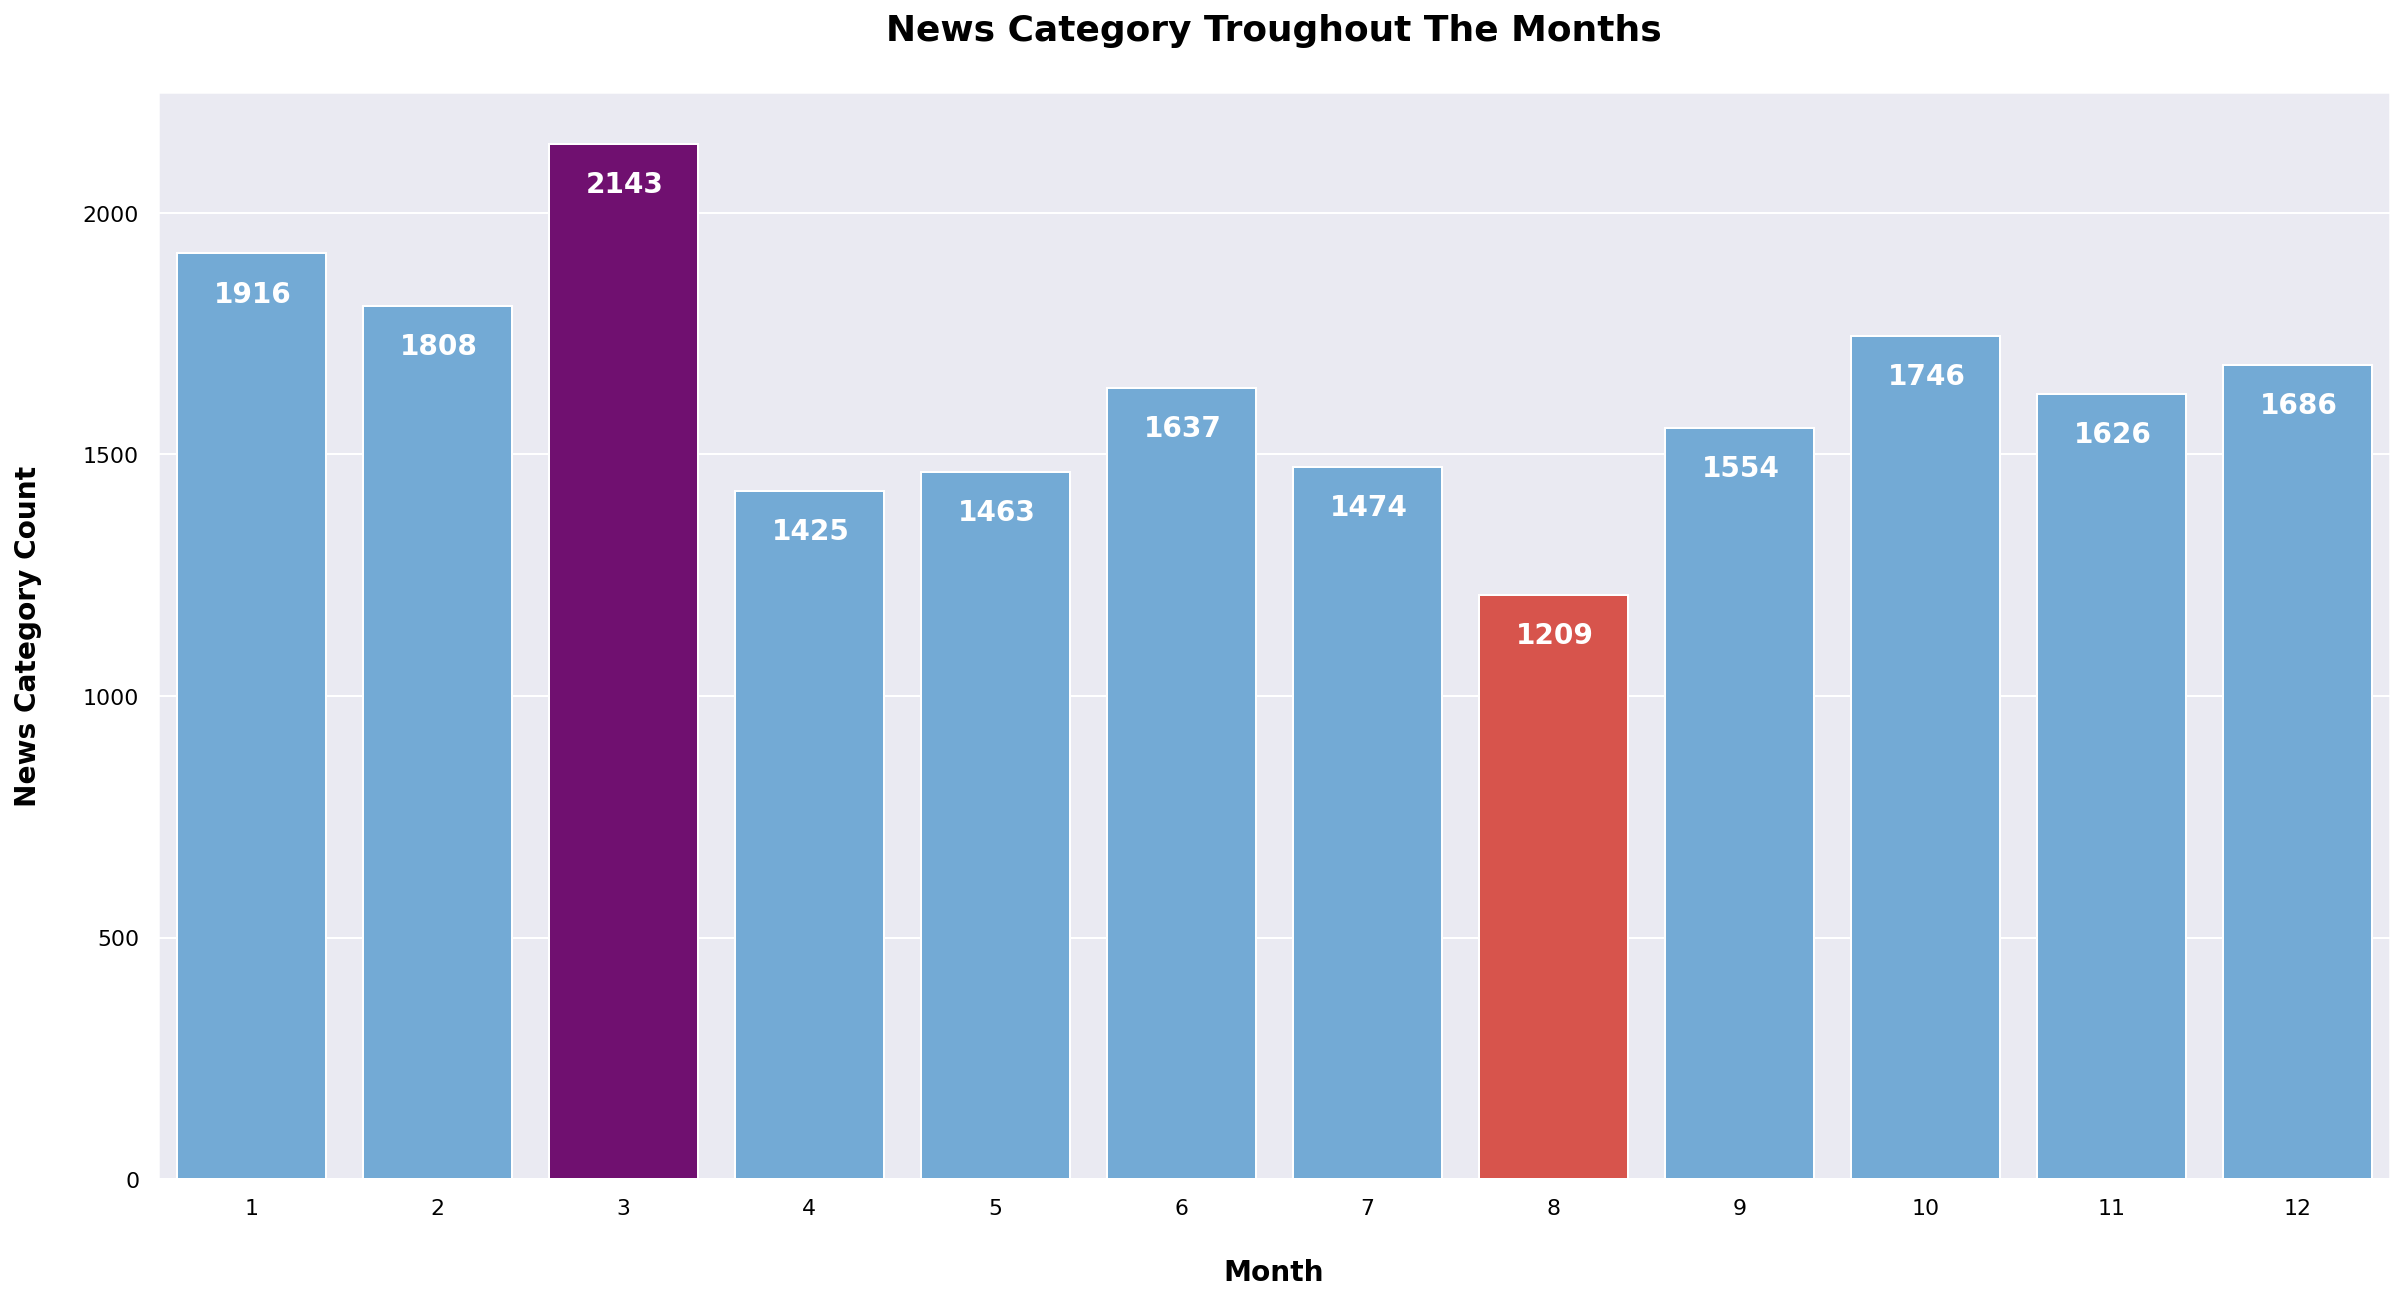

In [147]:
ax = sns.barplot(data = df_monthly, x = 'Month', y = 'News Count',
                 ci = None, 
                 palette = ['#ee4035' if (x == min(df_monthly['News Count'])) else '#63ace5' 
                            if (x < max(df_monthly['News Count'])) 
                            else 'purple' for x in df_monthly['News Count']])
plt.xlabel('\nMonth',size=14, color = 'black', weight = 'bold')
plt.ylabel('News Category Count\n', size=14, color = 'black', weight = 'bold')
plt.title('News Category Troughout The Months\n',size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()-100),
              size = 14,
              color = 'white',
              weight = 'bold')

plt.show()

It can be seen that the **lowest frequency of news category** happens to be on **August**, while the **highest frequency of news category** happens to be on **March**.

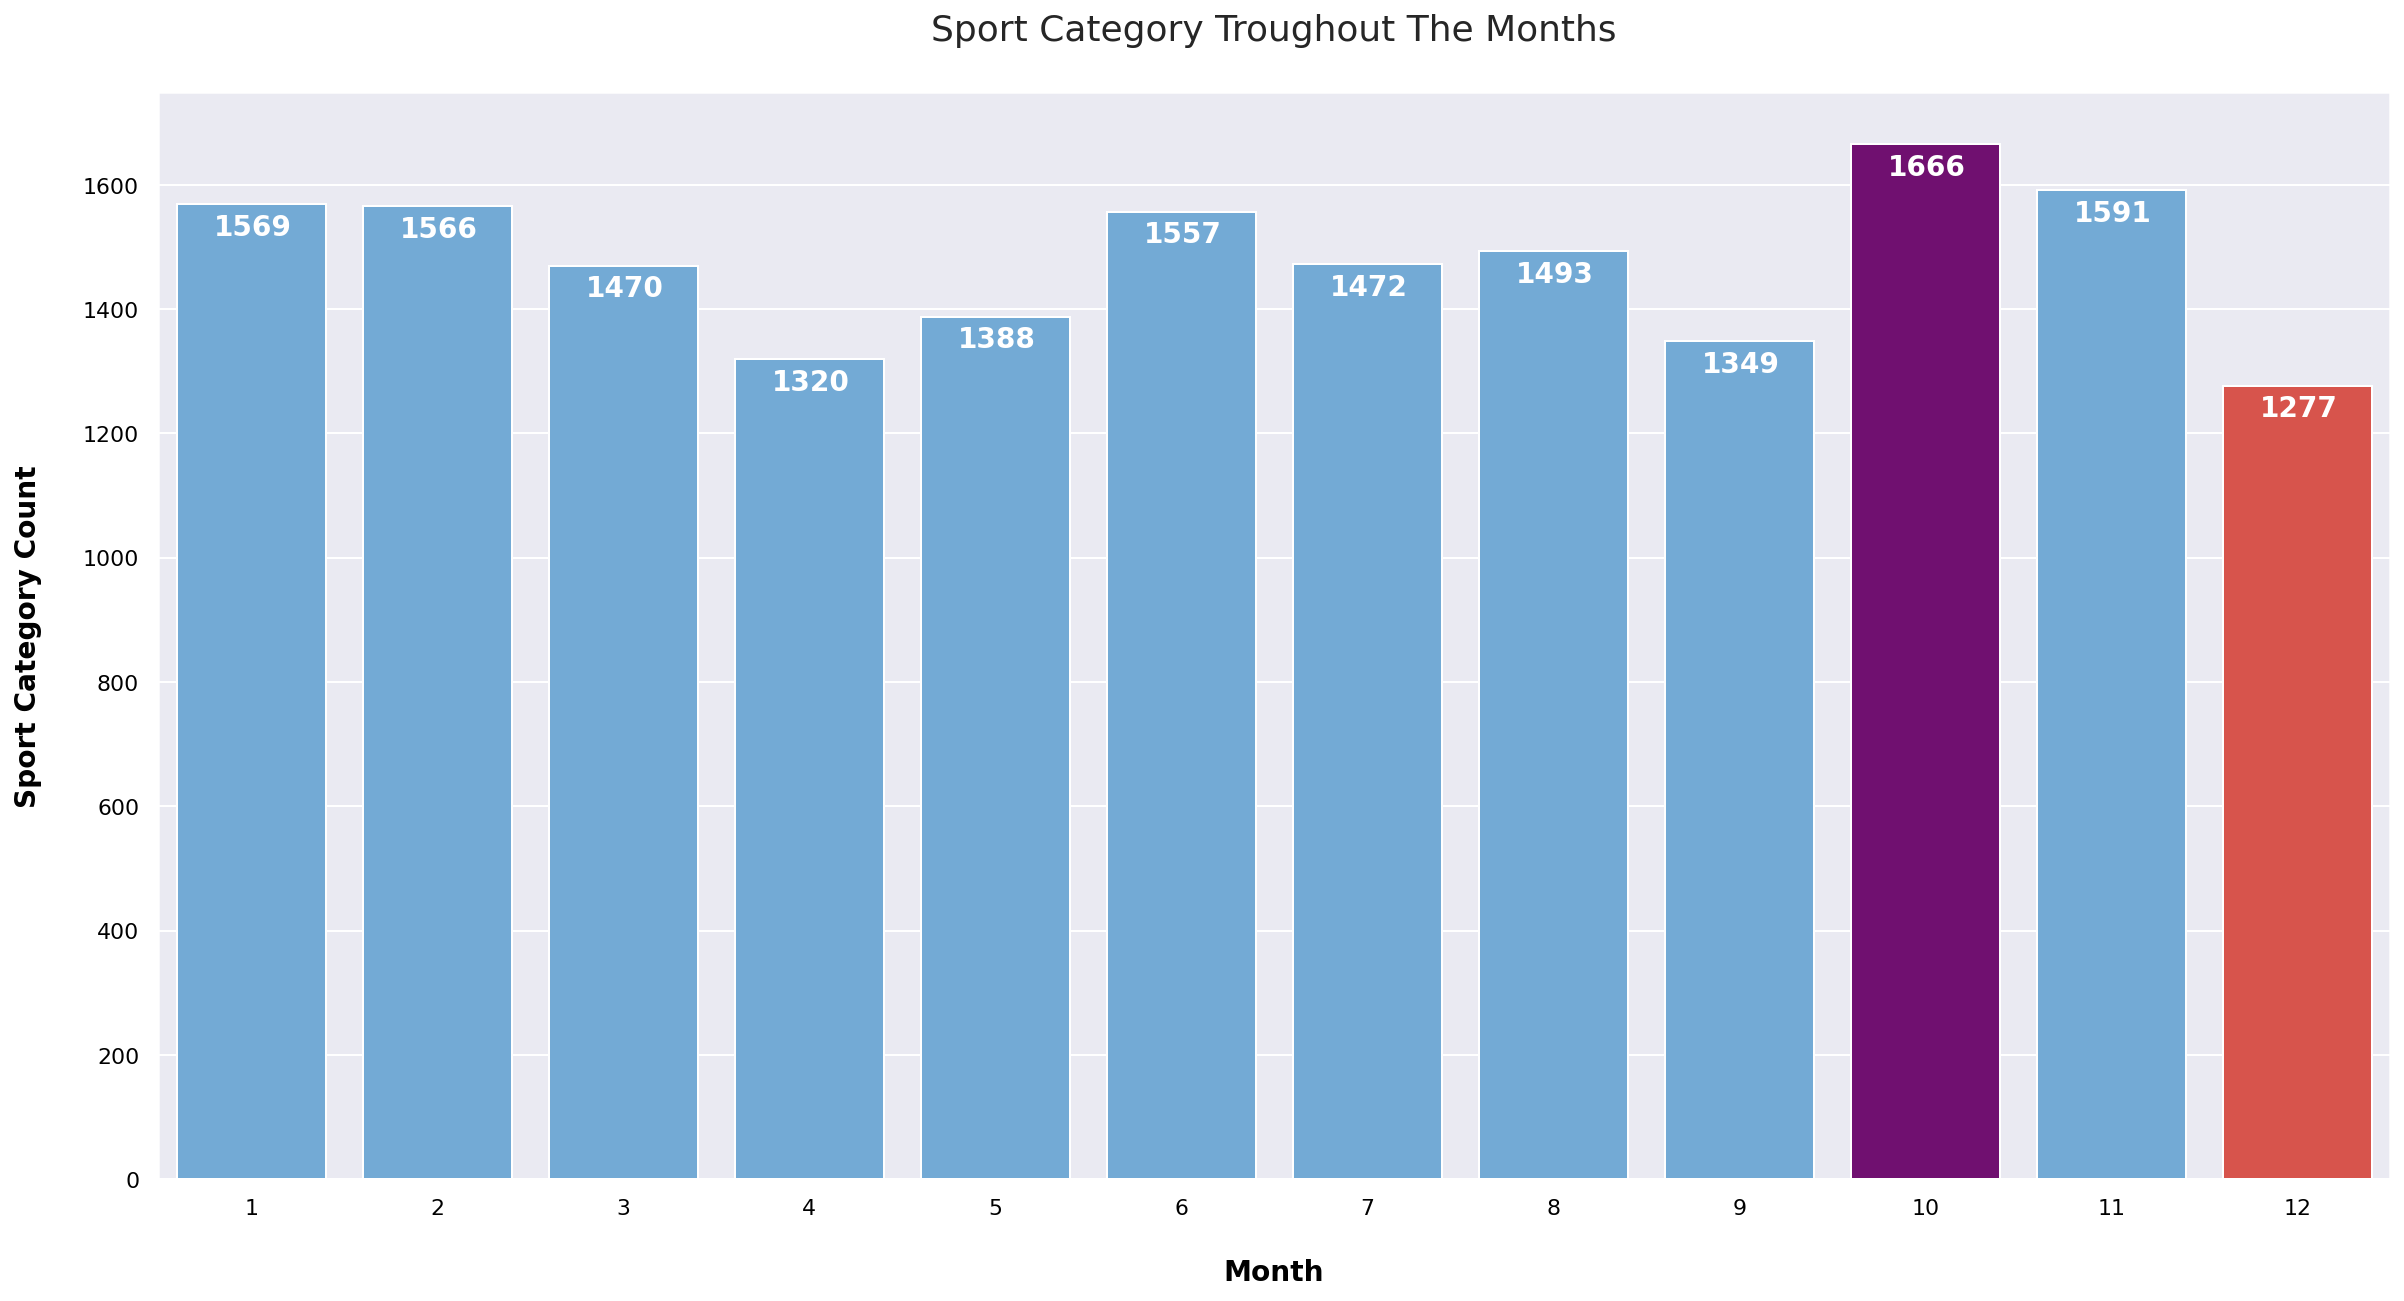

In [149]:
ax = sns.barplot(data = df_monthly, x = 'Month', y = 'Sport Count',
                 ci = None, 
                 palette = ['#ee4035' if (x == min(df_monthly['Sport Count'])) else '#63ace5' 
                            if (x < max(df_monthly['Sport Count'])) 
                            else 'purple' for x in df_monthly['Sport Count']])
plt.xlabel('\nMonth', size=14, color = 'black', weight = 'bold')
plt.ylabel('Sport Category Count\n', size=14, color = 'black', weight = 'bold')
plt.title('Sport Category Troughout The Months\n',size = 18)

for p in ax.patches:
      ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()-50),
                  color='white',
                  size=14,
                  weight='bold')

plt.show()

**The lowest frequency of sport category** happens to be on **December**, while **the highest frequency of sport category** happens to be on **October**.

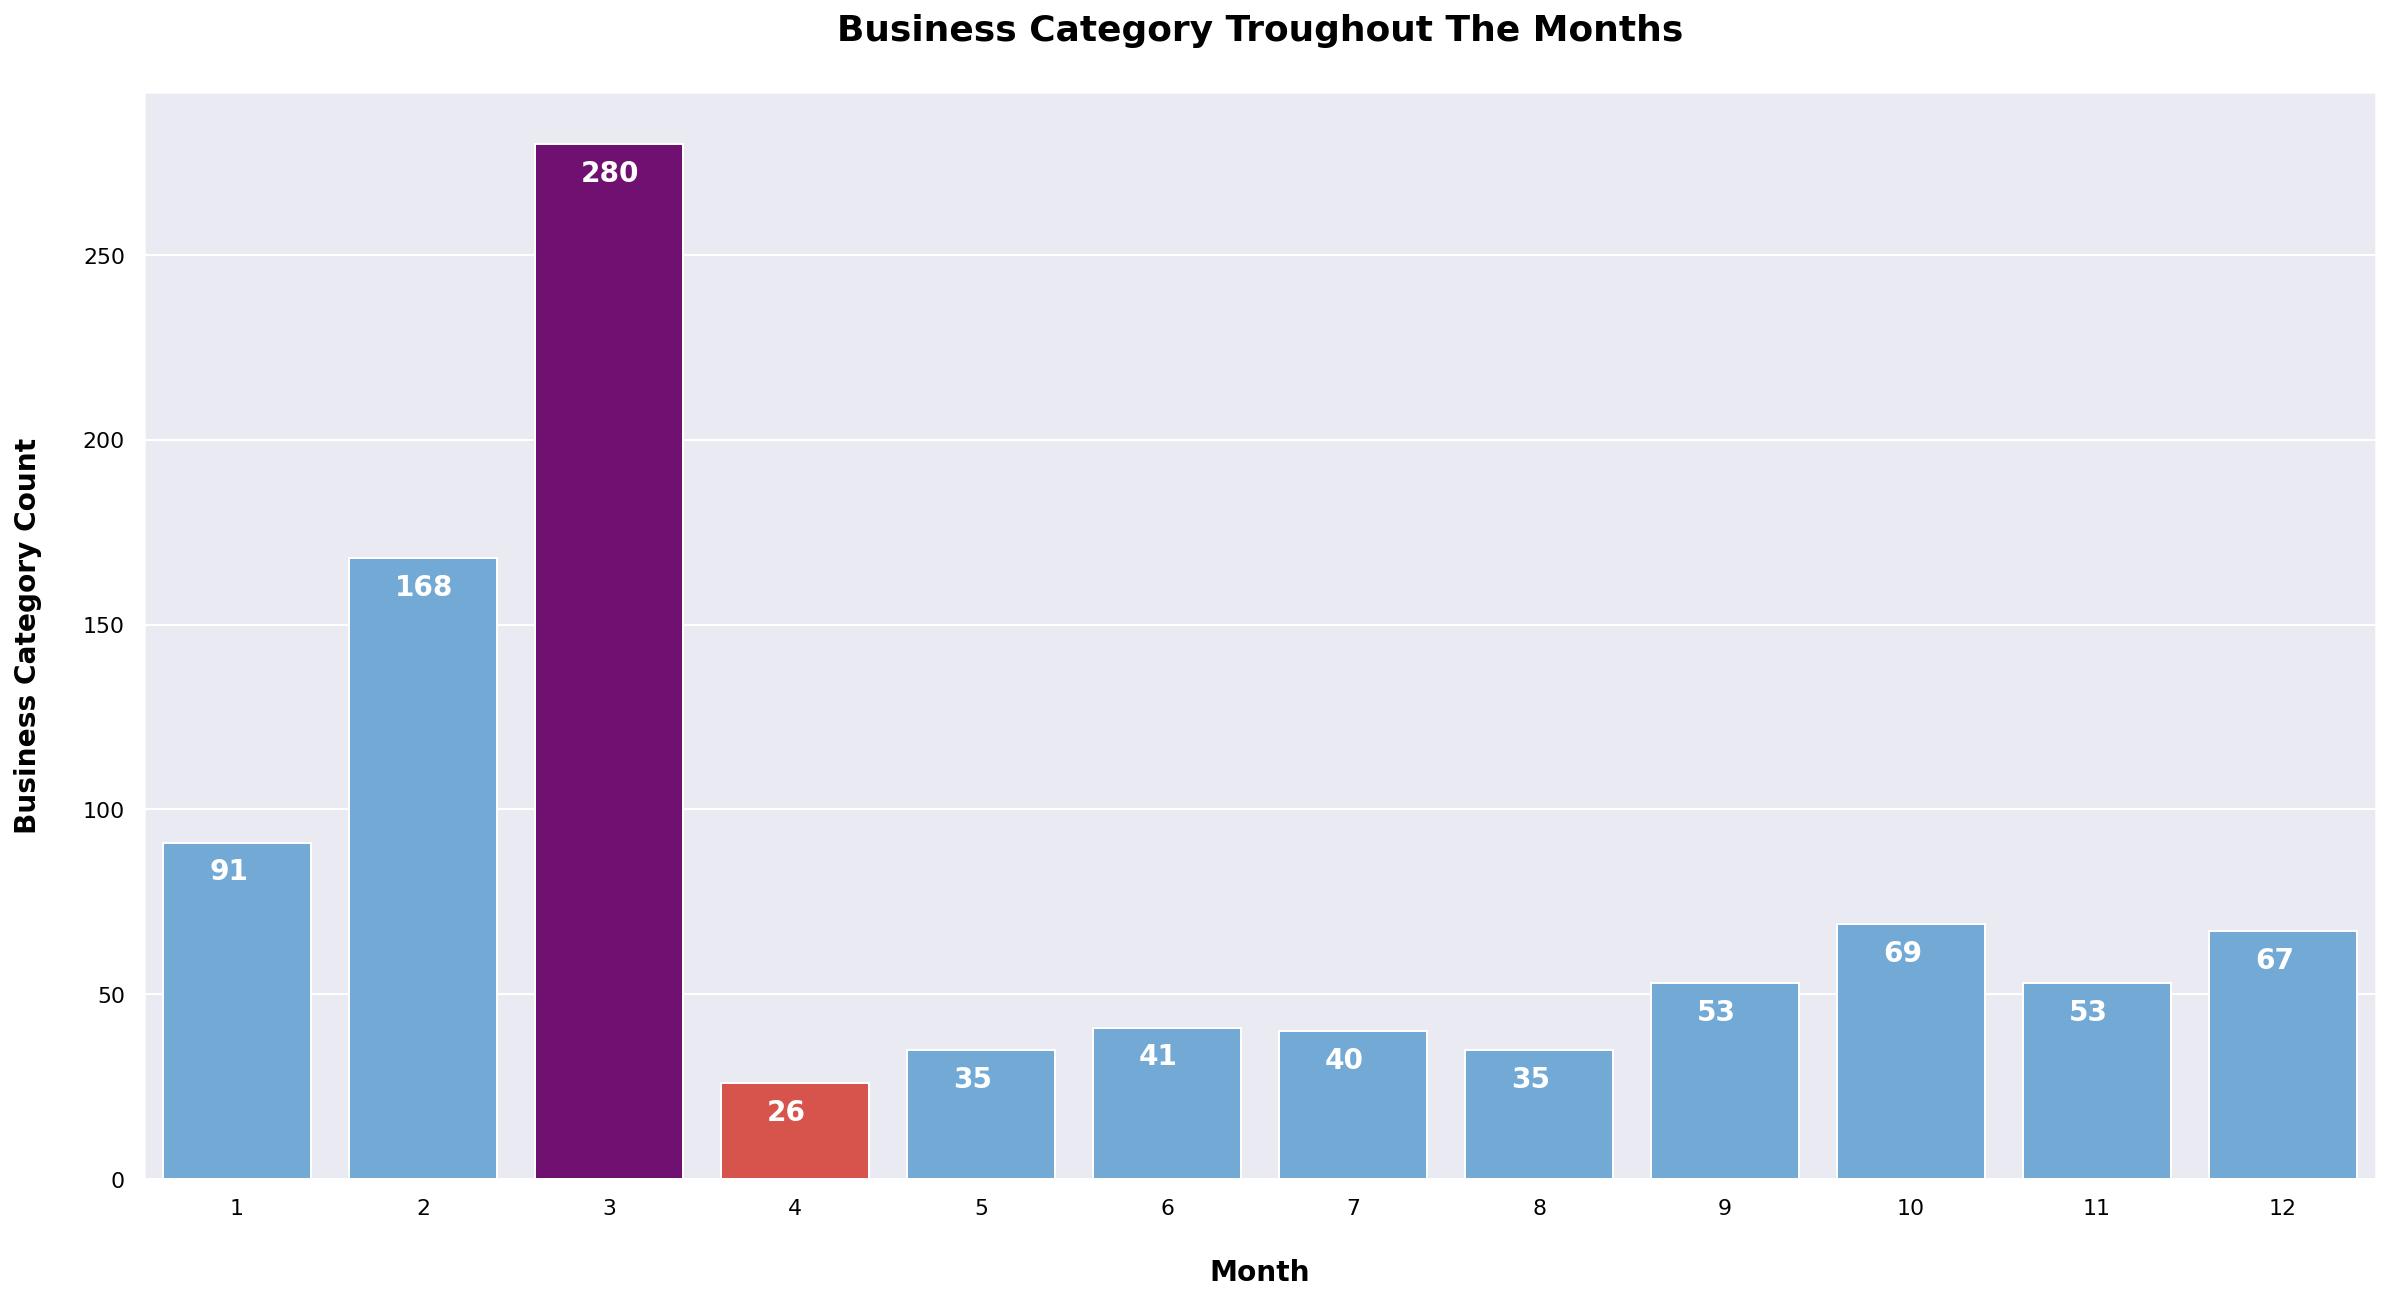

In [152]:
ax = sns.barplot(data = df_monthly, x = 'Month', y = 'Business Count',
                 ci = None, 
                 palette = ['#ee4035' if (x == min(df_monthly['Business Count'])) else '#63ace5' 
                            if (x < max(df_monthly['Business Count'])) 
                            else 'purple' for x in df_monthly['Business Count']])

plt.xlabel('\nMonth',size = 14, color = 'black', weight = 'bold')
plt.ylabel('Business Category Count\n', size = 14, color = 'black', weight = 'bold')
plt.title('Business Category Troughout The Months\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25,p.get_height()-10),
              color = 'white',
              size = 14,
              weight = 'bold')

plt.show()


**The lowest frequency of business category** happens to be on **April**, while **the highest frequency of business category** happens to be on **March**.

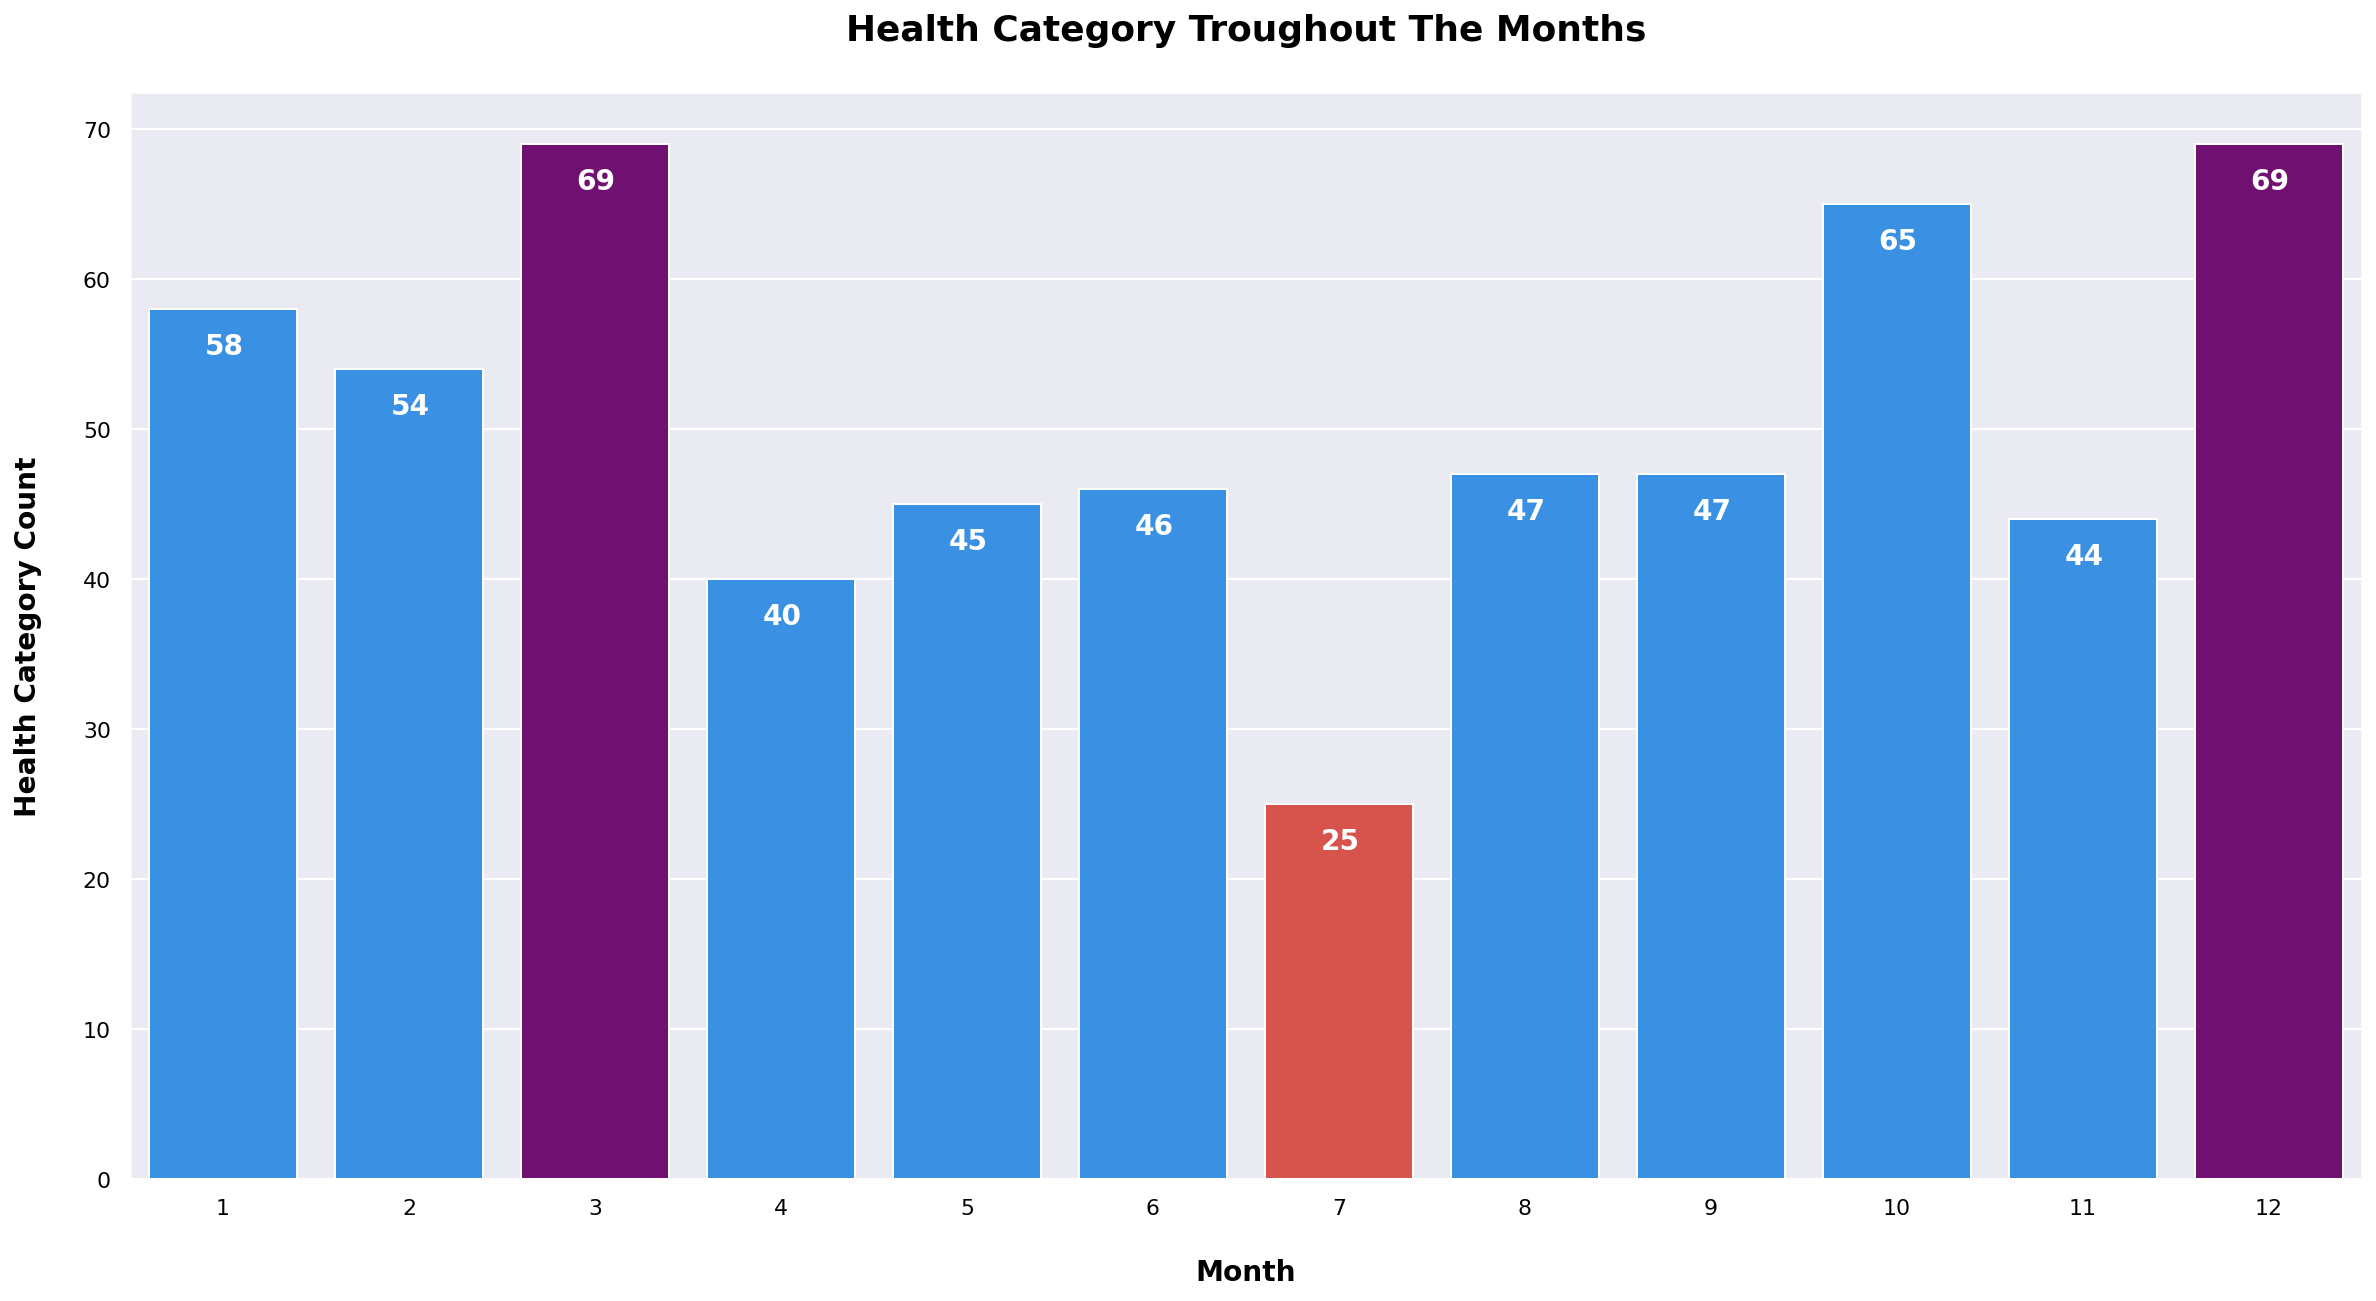

In [153]:
ax = sns.barplot(data=df_monthly, x ='Month', y = 'Health Count',
                 ci = None,
                 palette = ['#ee4035' if (x == min(df_monthly['Health Count'])) else 'dodgerblue' 
                            if (x < max(df_monthly['Health Count'])) 
                            else 'purple' for x in df_monthly['Health Count']])

plt.xlabel('\nMonth',size = 14, color = 'black', weight = 'bold')
plt.ylabel('Health Category Count\n', size = 14, color = 'black', weight = 'bold')
plt.title('Health Category Troughout The Months\n', size = 18, color = 'black',
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()-3),
              size = 14,
              weight = 'bold',
              color = 'white')

plt.show()

**The lowest frequency health category** happens to be on **Jully**, while **the highest frequency health category** happens to be on both **March** and **December**.

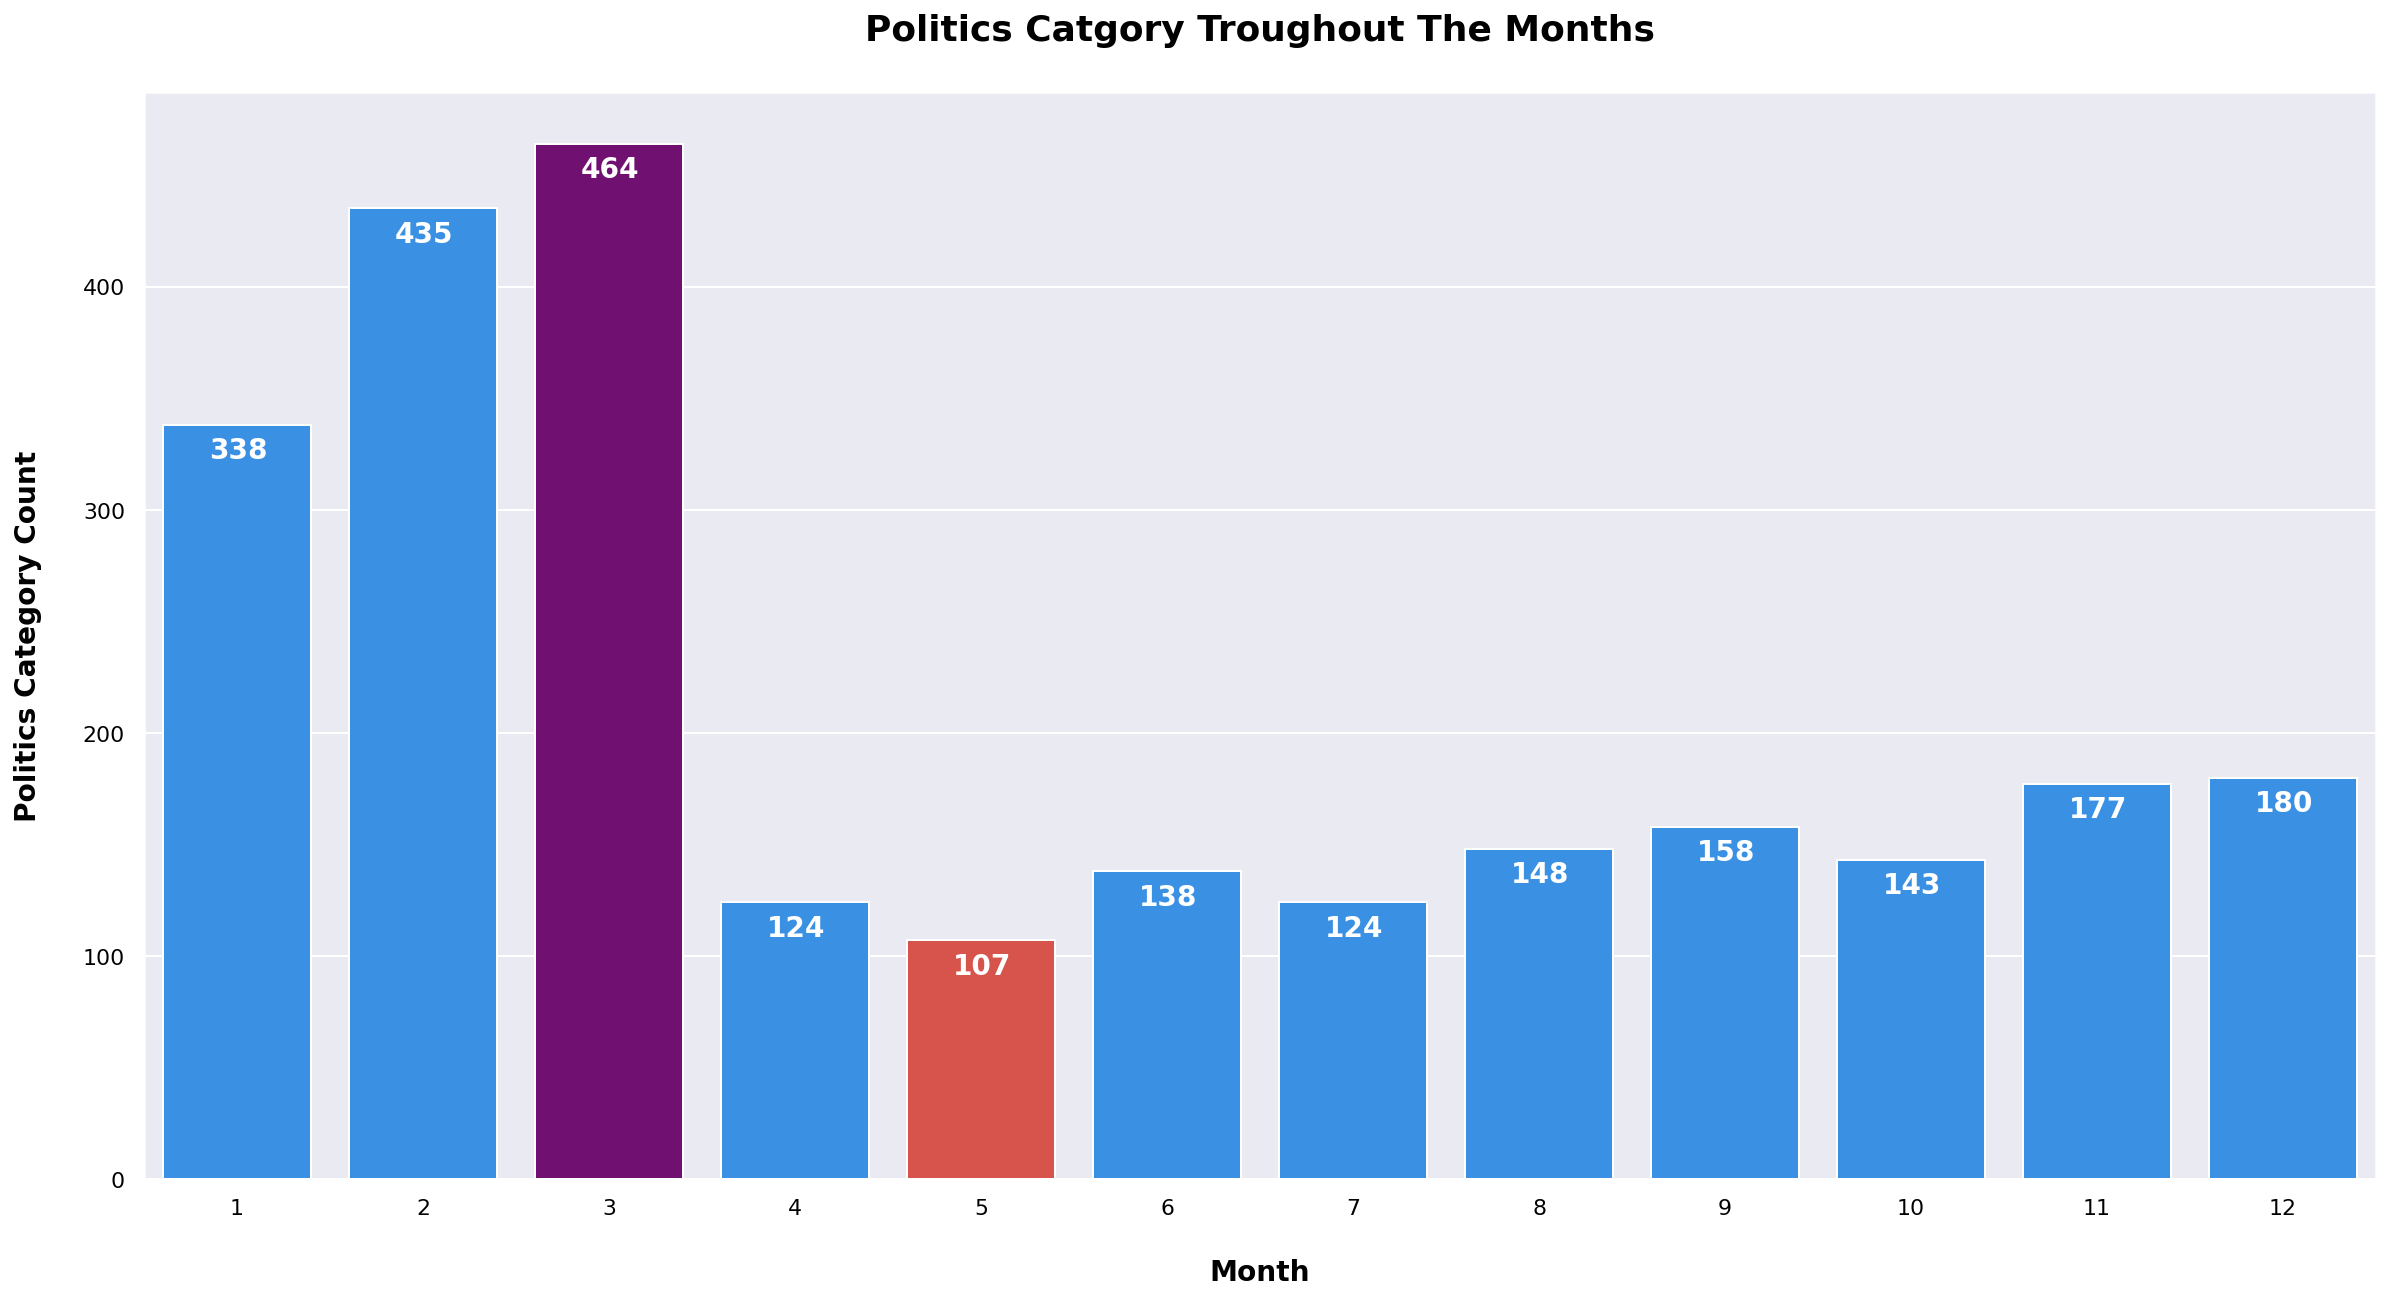

In [155]:
ax = sns.barplot(data = df_monthly, x = 'Month', y = 'Politics Count',
                 ci = None,
                 palette = ['#ee4035' if (x == min(df_monthly['Politics Count'])) else 'dodgerblue' 
                            if (x < max(df_monthly['Politics Count'])) 
                            else 'purple' for x in df_monthly['Politics Count']])

plt.xlabel('\nMonth', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Politics Category Count\n', size = 14, color = 'black', weight = 'bold')
plt.title('Politics Catgory Troughout The Months\n', size = 18, color = 'black', 
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()-15),
              size = 14,
              color = 'white',
              weight = 'bold')

plt.show()

**The lowest frequency of politics category** happens to be on **May**, while **the highest frequency of politics category** happens to be on **March**.

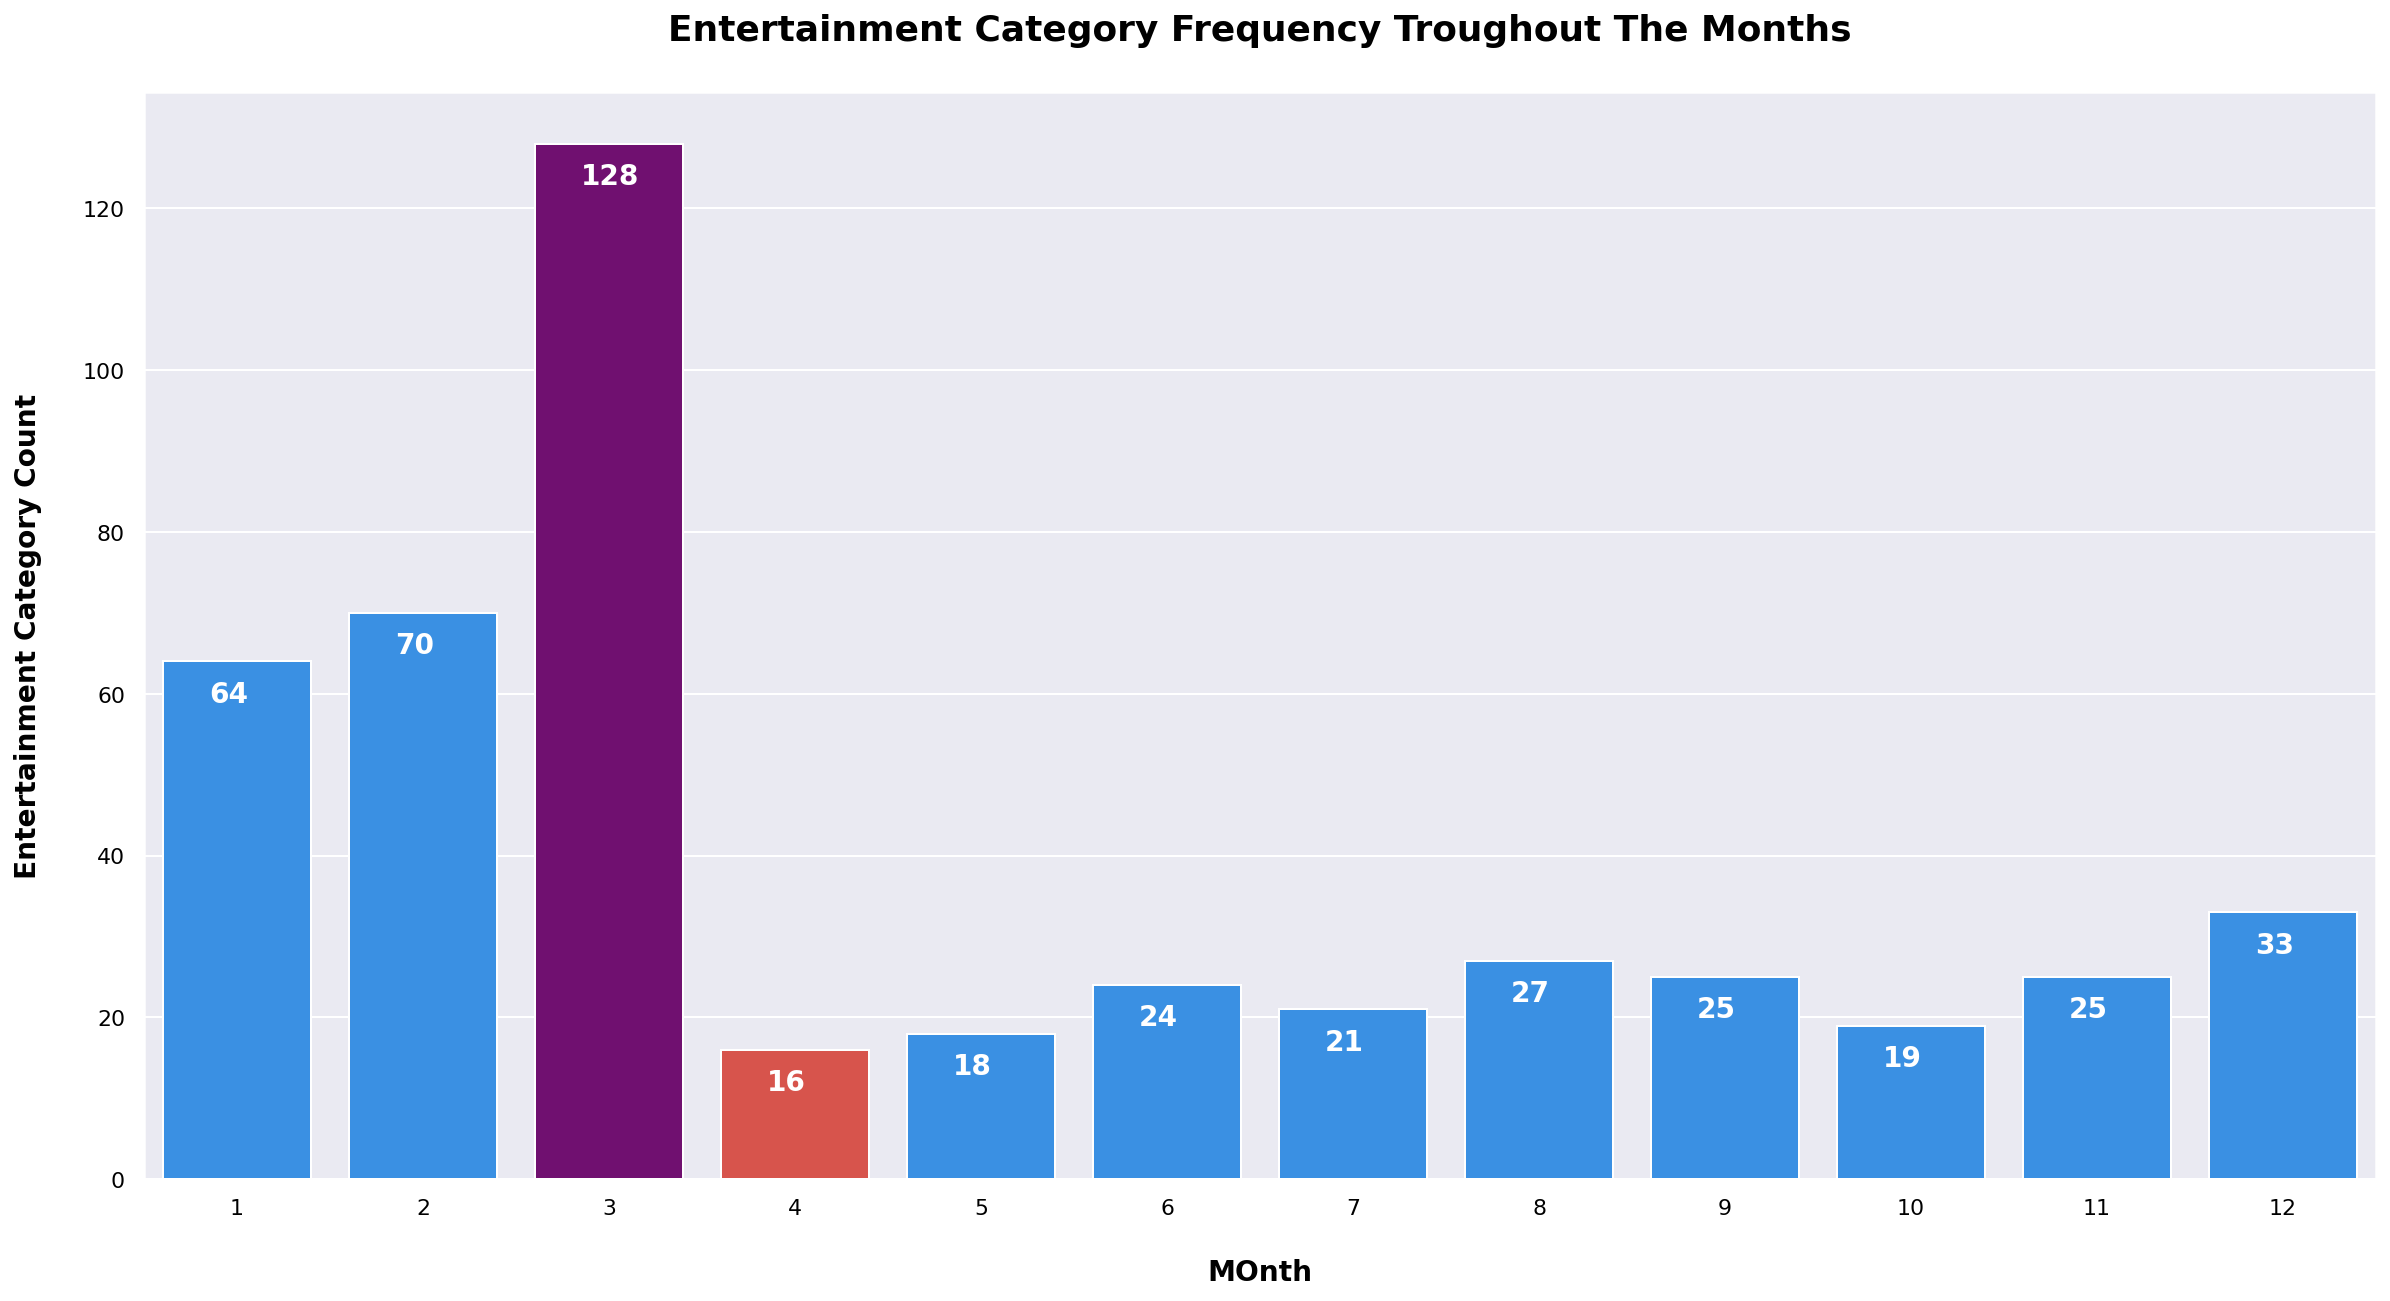

In [156]:
ax = sns.barplot(data = df_monthly, x = 'Month', y = 'Entertainment Count',
                 ci = None,
                 palette = ['#ee4035' if (x == min(df_monthly['Entertainment Count'])) else 'dodgerblue' 
                            if (x < max(df_monthly['Entertainment Count'])) 
                            else 'purple' for x in df_monthly['Entertainment Count']])
plt.xlabel('\nMOnth', size = 14, color = 'black', weight ='bold')
plt.ylabel('Entertainment Category Count\n', size = 14, color = 'black', weight ='bold')
plt.title('Entertainment Category Frequency Troughout The Months\n', size = 18, 
          color = 'black', weight ='bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()-5),
              color = 'white',
              size = 14,
              weight = 'bold')

plt.show()

**The lowest frequency of entertainment category** happens to be on **April**, while **the highest frequency of entertainment category** happens to be on **March**.

###Let's See What's Going On With The Section



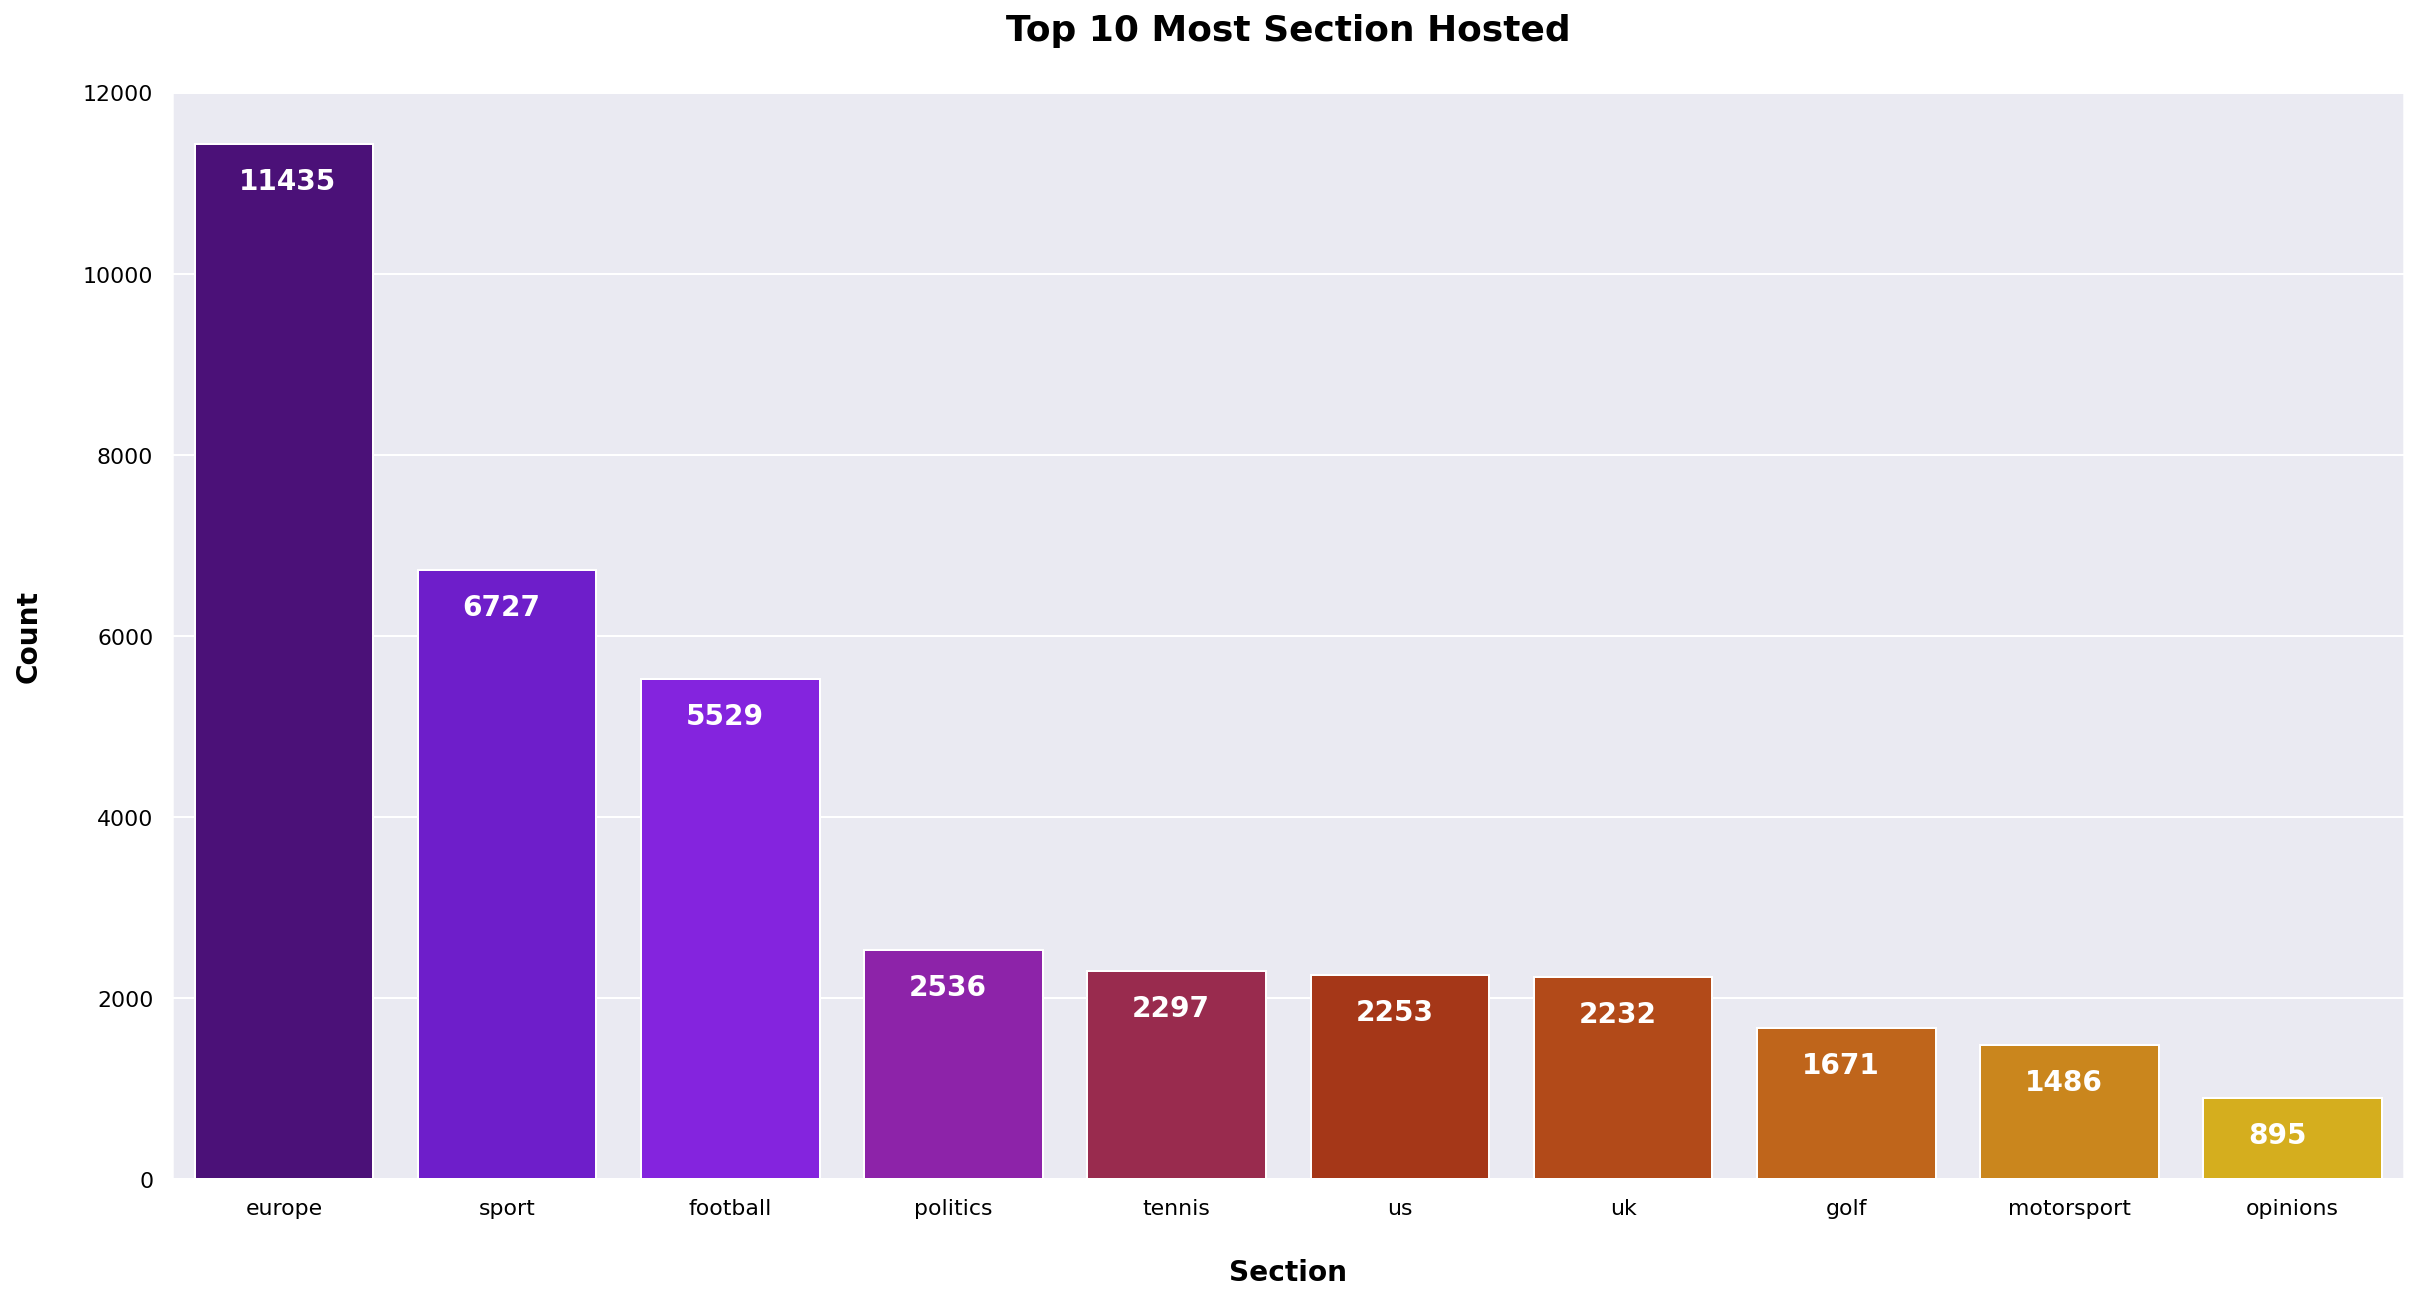

In [157]:
ax  = sns.countplot(x=df_full['Section'],
              order = df_full['Section'].value_counts(ascending=False)[:10].index,
              palette = 'gnuplot')

plt.xlabel('\nSection', size = 14, color = 'black', weight = 'bold')
plt.ylabel('Count\n', size = 14, color = 'black', weight = 'bold')
plt.title('Top 10 Most Section Hosted\n', size = 18, color = 'black', 
          weight = 'bold')

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()-500),
              color = 'white',
              size = 14,
              weight = 'bold')

plt.show()

##CONCLUSION
- It seems that CNN post mostly about Sport and News on every month, with **Sport Category** being the *most* post followed by **News Category**. 

- CNN mostly post news in the **first quarter of a year**, with most of the category posted on **March**, except for **Sport Category**.

- Seems like CNN mostly post news in the **first quarter of a year**.

- **Breakking News Category** and **Sport Category** dominating CNN News.

- CNN News *constantly* increases their news frequency **every year** since 2011.

